# Анализ поведения клиентов сети фитнес-центров

## Введение

### Имеющиеся у нас данные:

- 'Churn' — факт оттока в текущем месяце;
- Текущие поля в датасете:
    - Данные клиента за предыдущий до проверки факта оттока месяц:
        - 'gender' — пол;
        - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
        - 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        - Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        - 'Phone' — наличие контактного телефона;
        - 'Age' — возраст;
        - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
    - 'Group_visits' — факт посещения групповых занятий;
    - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
    - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
    - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

### Стоящие перед нами задачи:

В первой части:

   - Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучить средние значения и стандартные отклонения;
   - Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
   - Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
   - Построить матрицу корреляций и отобразить её.

Во второй части:

Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
   - Разбить данные на обучающую и валидационную выборку функцией train_test_split().
   - Обучить модель на train-выборке двумя способами:
        - логистической регрессией,
        - случайным лесом.
   - Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Какая модель показала себя лучше на основании метрик?

В третьей части:

Провести кластеризацию объектов (клиентов):
   - Стандартизировать данные.
   - Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. На основании полученного графика предположить, какое количество кластеров можно выделить.
   - Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов. 
   - Посмотреть на средние значения признаков для кластеров. Определить, можно ли сразу что-то заметить.
   - Построить распределения признаков для кластеров. Определить, можно ли что-то заметить по ним.
   - Для каждого полученного кластера посчитать долю оттока. Ответить на вопрос, отличаются ли они по доле оттока, какие кластеры склонны к оттоку, а какие — надёжны.

В четвертой части:

Сформулировать основные выводы и предложить рекомендации для стратегии взаимодействия с клиентами и их удержания.

Приступим к исследованию и начнем с первой части.

## Шаг 2. Загрузка и исследовательский анализ данных (EDA)

### Подготовка

Для начала импортируем библиотеки, которые понадобятся нам для выполнения исследования.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, silhouette_score

Теперь загрузим имеющийся у нас датасет и изучим его основные характеристики.

In [2]:
gym_churn_df=pd.read_csv('/datasets/gym_churn.csv')
print(gym_churn_df.info())
display(gym_churn_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Хорошая новость состоит в том, что пропусков в данных нет, типы данных также указаны корректно. Перейдем к изучению средних значений и стандартных отклонений.

### Исследовательский анализ данных

In [3]:
display(gym_churn_df.describe())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Что ж, видим первые интересные данные. Во-первых, количество мужчин и женщин в нашем датасете почти одинаково (мы не знаем, какой пол скрывается за цифрой 0, а какой за 1, так что не можем сказать, кого больше). Во-вторых, почти 85% клиентов посещают фитнес-центр по месту своего жительства или работы. Это вряд ли можно считать неожиданностью, но будем это учитывать. Кроме того, почти половина клиентов - сотрудники компаний-партнеров клуба. Это уже можно считать существенной информацией, которая вполне может повлиять на поведение клиентов. Что касается показателя длительности текущего дествующего абонемента, среднее значение равно почти 4,7 месяцам, но медиана равна 1, а стандартное отклонение равно 4,5 месяцам. Впрочем, выводы на основании одной только этой характеристики делать рано - речь идет только о текущем абонементе, и вполне возможно, что даже постоянные клиенты не продлевают абонемент на длительный срок, а пользуются краткосрочными. В этом смысле более показателен параметр Lifetime - на нем мы видим, что медиана составляет 3 месяца, а среднее - 3,72 месяцеа. Стандартное отклонение очень велико и составляет 3,74 месяца. Это значит, что, судя по всему, происходит активное обновление клиентской базы - старые клиенты сменяются новыми. Таким образом, низкий медианный период абонемента все же может быть поводом для беспокойства, но подробнее этот вопросы мы изучим далее. Наконец, наш целевой показатель - отток посетителей - составляет 26,5%, что довольно много. Над его улучшением нам и предстоит работать.

Теперь посмотрим на средние значения признаков в двух группах - тех, кто ушел в отток, и тех, кто остался.

In [4]:
display(gym_churn_df.groupby('Churn').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Как видим, среди клиентов, которые не ушли в отток, в среднем больше тех, кто посещает спортзал рядом с местом работы или учебы(прочем, разрыв не так велик), существенно больше сотрудников компаний-партнеров клуба и почти в два раза больше тех, пришел в рамках акции «приведи друга» - последнее уже можно считать весьма полезной информацией. Кроме того, те, кто не ушел в отток, имеют гораздо большее среднее время действующего абонемента (что не удивительно и скорее является следствием, а не причиной), гораздо чаще посещают групповые занятия (это также можно считать зацепкой для удержания клиентов) и в среднем тратят почти на 40% больше денег на дополнительные услуги (также может быть скорее следствием, чем причиной, но можно трактовать по-разному). Кроме того, у не ушедших в отток клиентов в среднем более чем в три раза больший срок до окончания текущего абонемента (также неудивительно - если клиент уже купил долгосрочный абонемент, он с большей вероятностью использует его до конца) и почти в 5 раз больший lifetime - это значит, что клиенты либо приходят и сразу уходят, либо остаются на более или менее длительный срок. Кроме того, не ушедшие в отток клиенты существенно чаще посещают занятия в целом и почти в два раза чаще - в течение предыдущего месяца. Этот показатель представляется особенно важным - он позволяет почти сразу с довольно большой точностью оперделить, уйдет ли клиент в отток.

В общем и целом, каких-то неожиданных откровений здесь нет - все важные показатели у клиентов, не ушедших в отток, выше, чем у тех, кто ушел. Но пищу для размышлений эти данные дают.

Теперь разделим датафрейм на две группы - тех пользователей, которые ушли в отток, и тех, которые остались.

In [5]:
gym_stay=gym_churn_df.query('Churn==0')
gym_leave=gym_churn_df.query('Churn==1')
print(gym_stay.info())
display(gym_stay.head(10))
print(gym_leave.info())
display(gym_leave.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2939 entries, 0 to 3999
Data columns (total 14 columns):
gender                               2939 non-null int64
Near_Location                        2939 non-null int64
Partner                              2939 non-null int64
Promo_friends                        2939 non-null int64
Phone                                2939 non-null int64
Contract_period                      2939 non-null int64
Group_visits                         2939 non-null int64
Age                                  2939 non-null int64
Avg_additional_charges_total         2939 non-null float64
Month_to_end_contract                2939 non-null float64
Lifetime                             2939 non-null int64
Avg_class_frequency_total            2939 non-null float64
Avg_class_frequency_current_month    2939 non-null float64
Churn                                2939 non-null int64
dtypes: float64(4), int64(10)
memory usage: 344.4 KB
None


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0
10,0,1,0,0,0,6,1,32,229.708945,6.0,3,1.641180,1.367714,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 7 to 3996
Data columns (total 14 columns):
gender                               1061 non-null int64
Near_Location                        1061 non-null int64
Partner                              1061 non-null int64
Promo_friends                        1061 non-null int64
Phone                                1061 non-null int64
Contract_period                      1061 non-null int64
Group_visits                         1061 non-null int64
Age                                  1061 non-null int64
Avg_additional_charges_total         1061 non-null float64
Month_to_end_contract                1061 non-null float64
Lifetime                             1061 non-null int64
Avg_class_frequency_total            1061 non-null float64
Avg_class_frequency_current_month    1061 non-null float64
Churn                                1061 non-null int64
dtypes: float64(4), int64(10)
memory usage: 124.3 KB
None


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
25,0,0,0,0,1,1,0,29,57.730007,1.0,0,1.491187,1.246807,1
41,0,1,1,1,0,1,0,25,161.607349,1.0,1,0.878950,0.009244,1
46,1,1,0,0,1,1,0,26,54.184236,1.0,0,0.854079,0.000000,1
52,1,1,0,1,1,1,1,30,252.915683,1.0,1,1.491547,1.059261,1
57,0,1,0,0,1,6,1,27,236.915828,6.0,0,0.996493,0.000000,1


Как видим, все разделилось корректно, в сумме количество строк в двух получившихся датафреймах совпадает с количеством строк в исходном. Теперь построим столбчатые гистограммы распределения признаков для каждого из признаков в каждом из датафреймов. Для удобства напишем функцию.

In [6]:
def draw_hist(df):
    for column in df:
        df.plot(kind='hist', 
            y=column,
            figsize=(15,5),
            bins=20,
            grid=True,
            legend=False)
        plt.ylabel('Частота встречаемости')
        plt.title(column)
        plt.show()

Теперь применим функцию к датафрейму, содержащему данные о тех посетителях, которые остались (не ушли в отток).

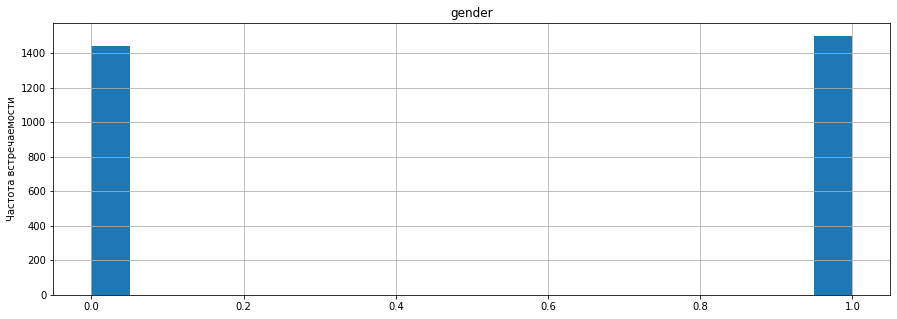

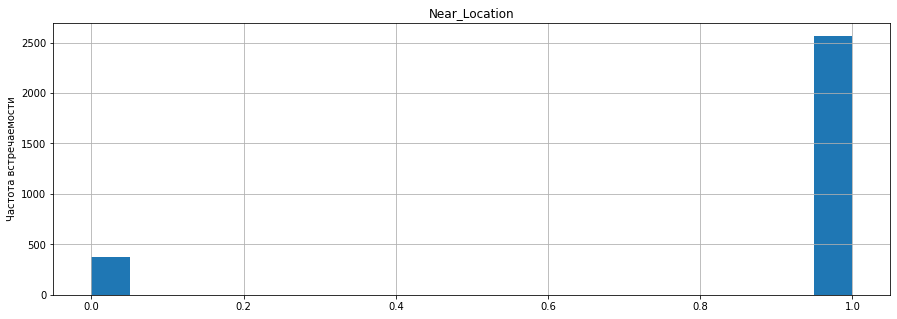

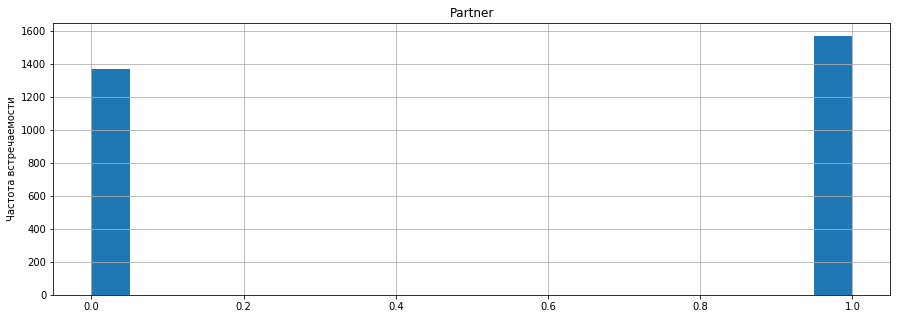

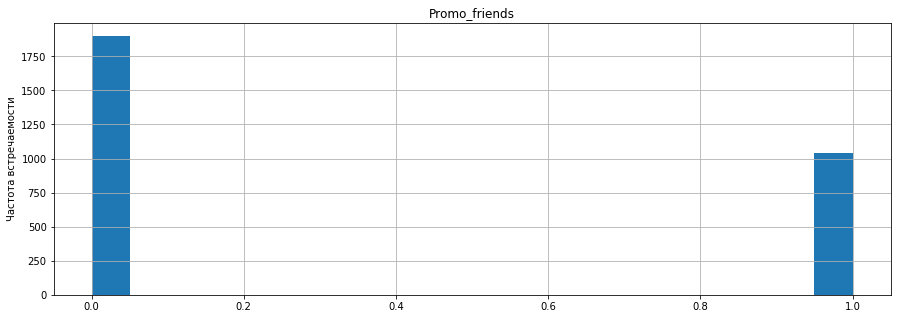

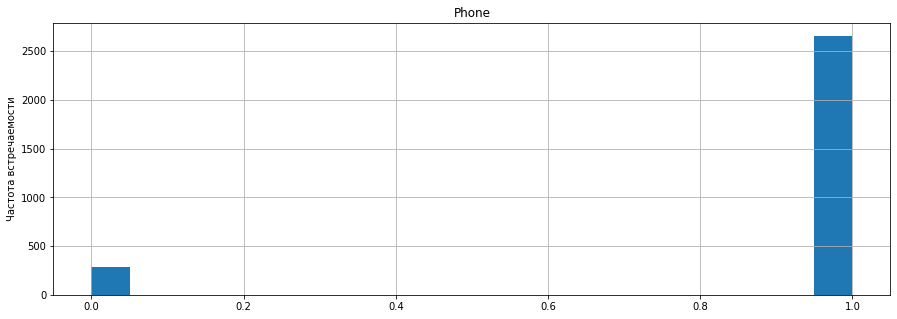

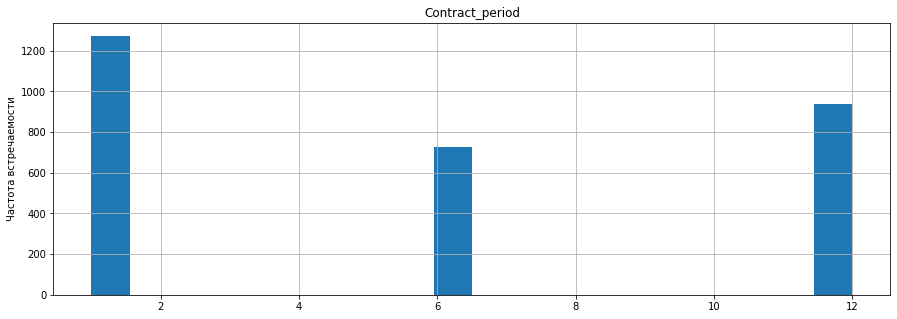

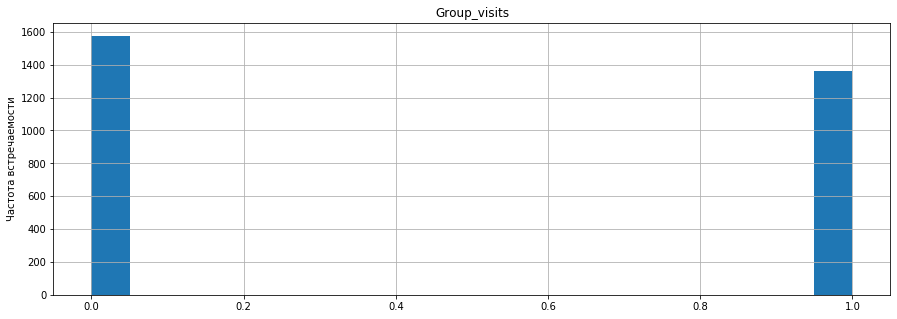

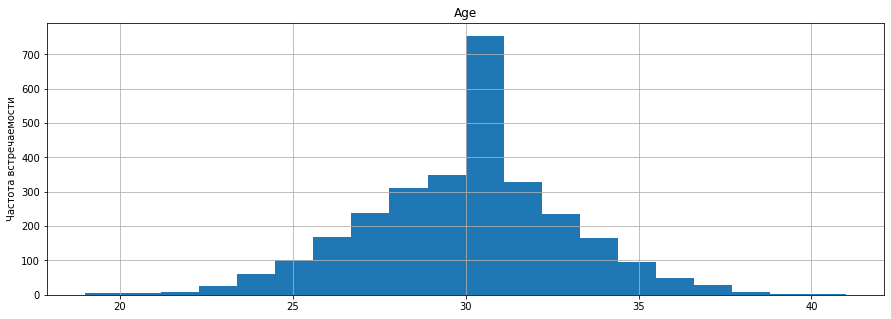

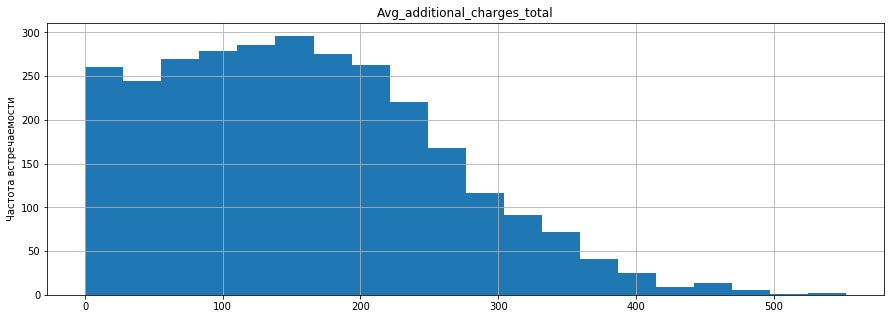

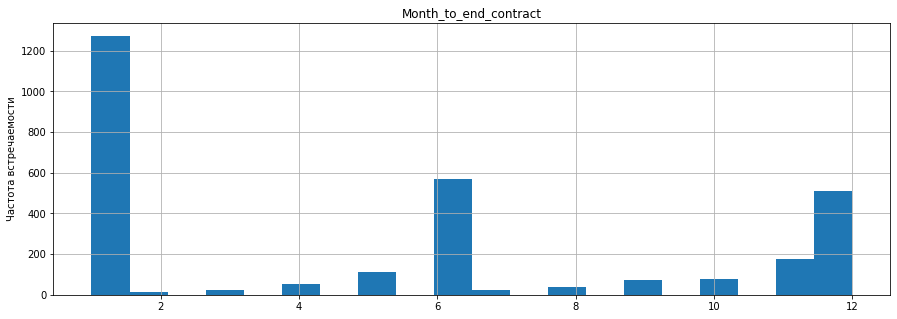

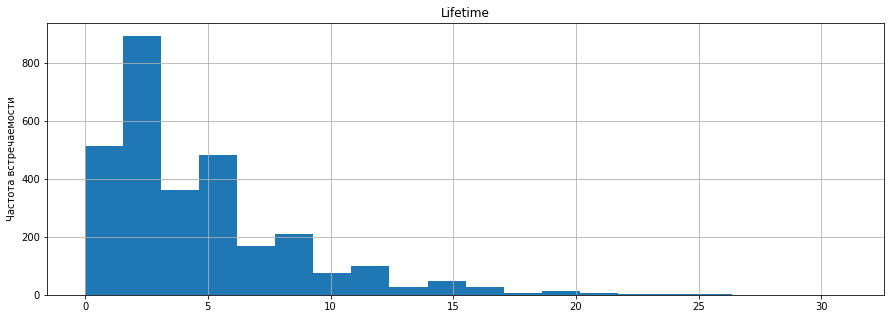

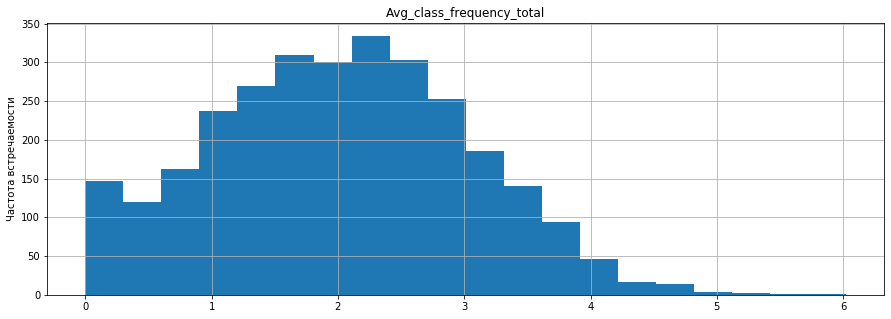

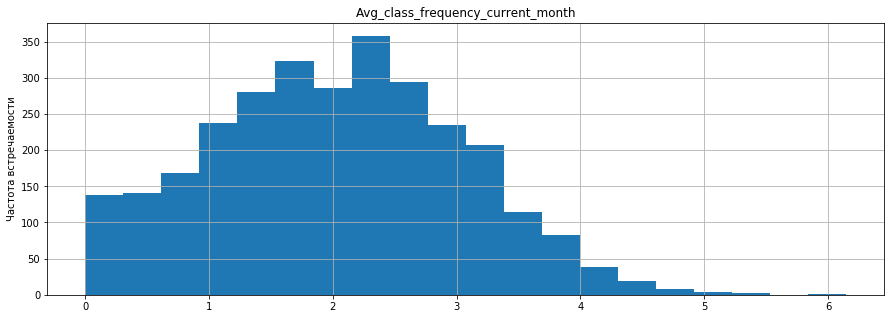

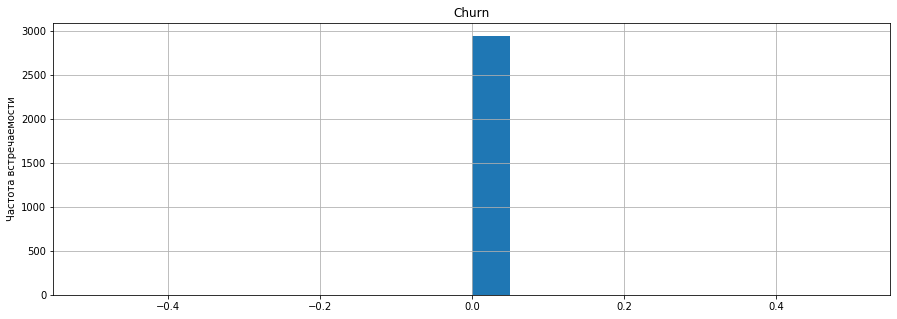

In [7]:
draw_hist(gym_stay)

Теперь проделаем то же самое с датафреймом по пользователям, которые ушли в отток.

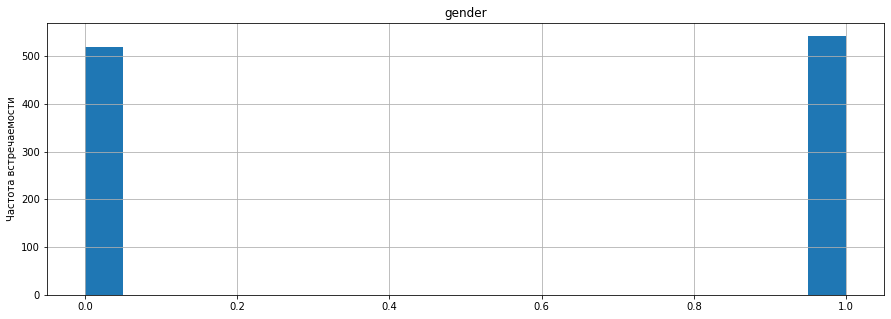

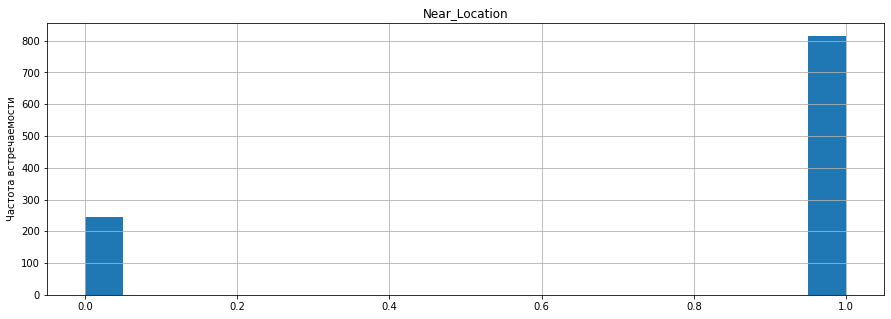

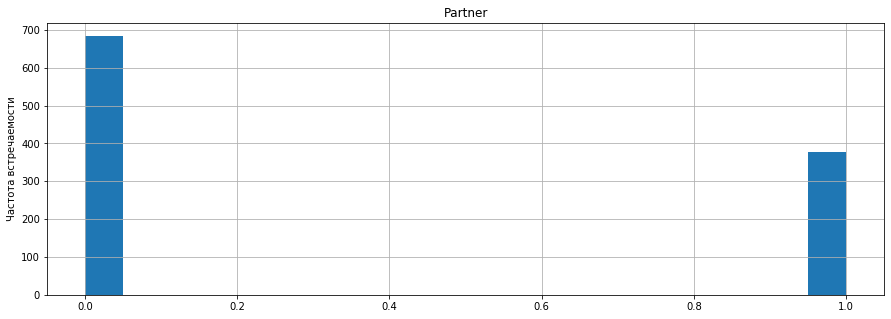

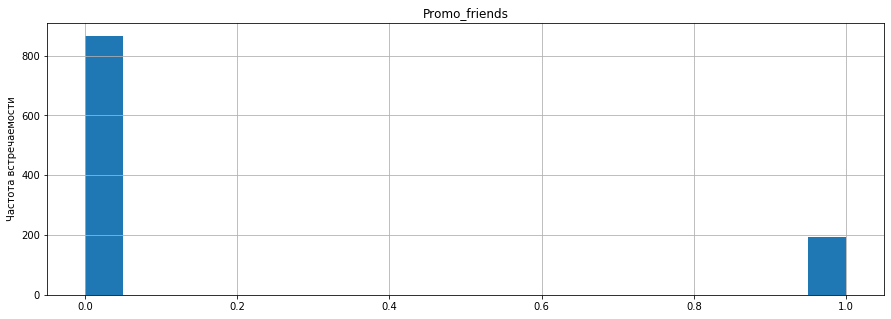

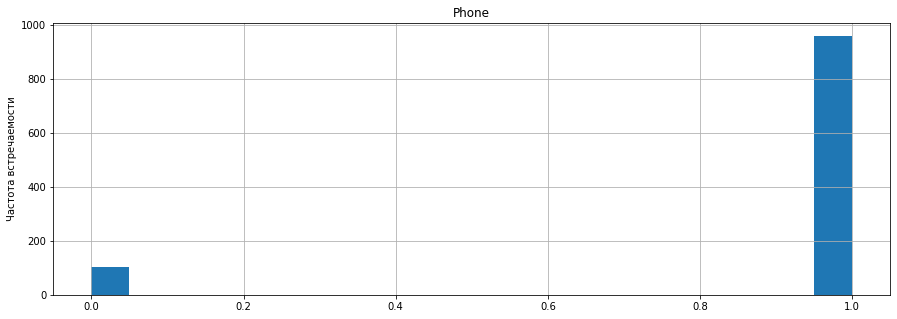

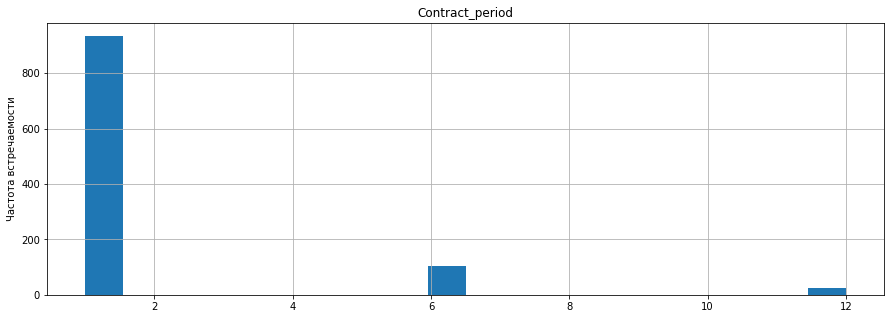

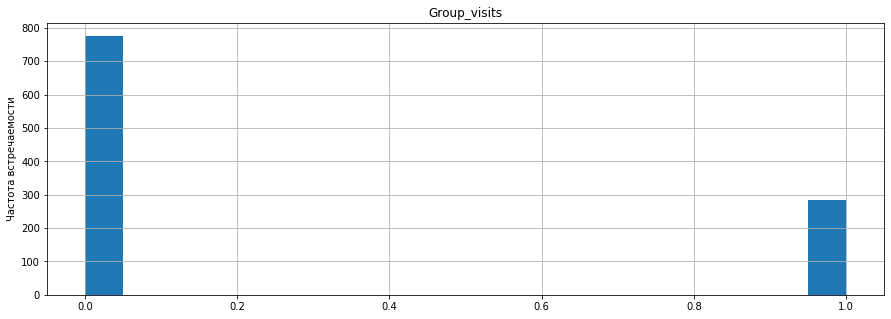

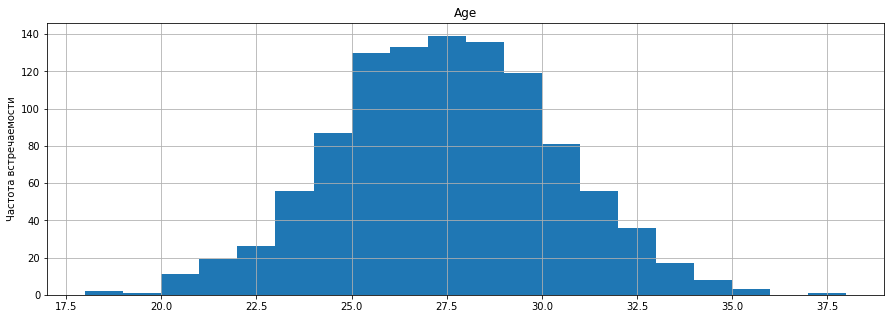

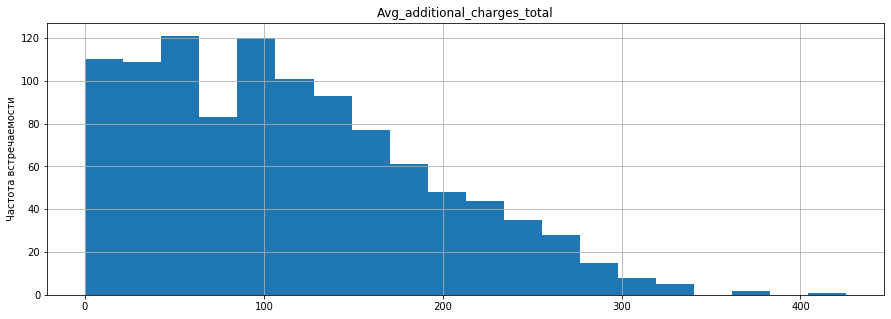

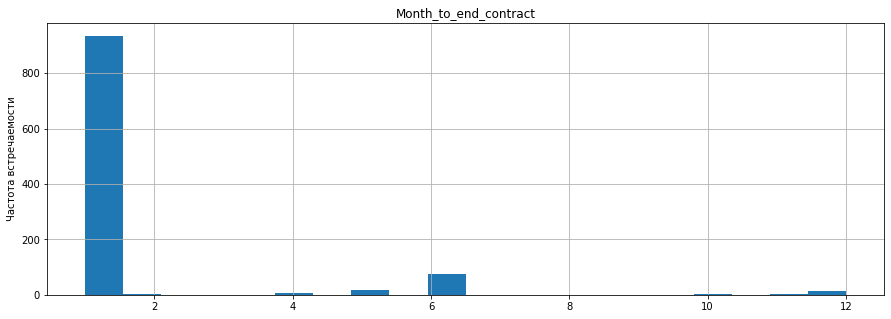

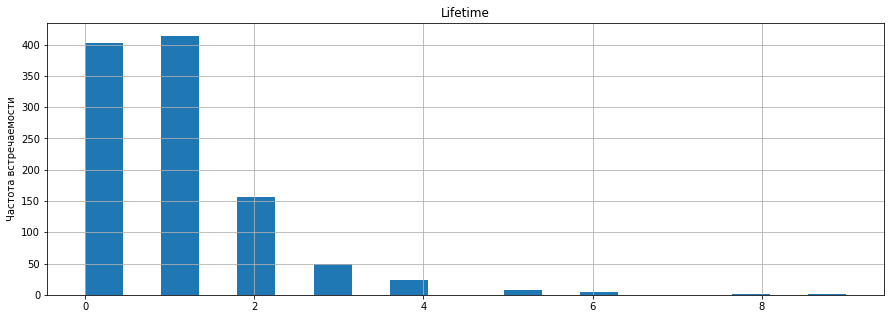

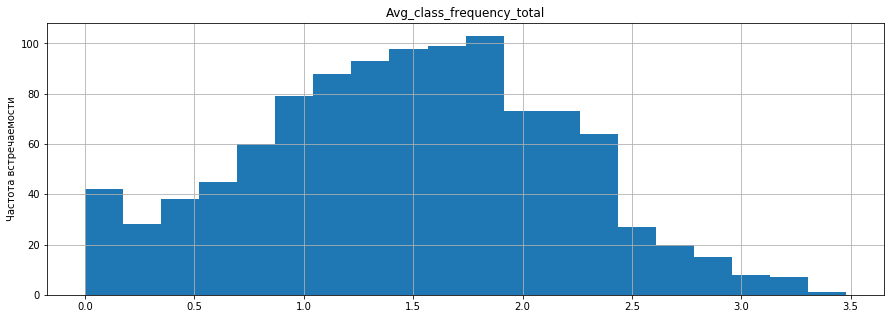

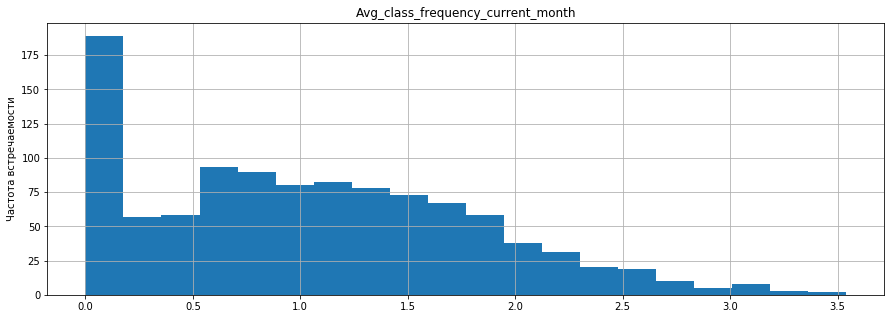

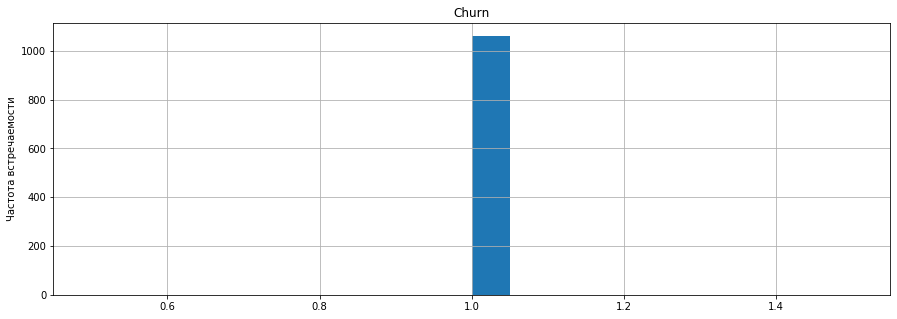

In [8]:
draw_hist(gym_leave)

Теперь построим гистрограммы распределения признаков для ушедших и оставшихся клиентов. Также начнем с написания функции.

In [9]:
 def draw_distplot(df):
        for column in df:
            plt.figure(figsize=(10, 5))
            sns.distplot(df[column])
            plt.title(column)
            plt.ylabel('Частота встречаемости')
            plt.show()

Теперь применим функцию для построения гистограмм. Начнем с клиентов, которые не ушли в отток.

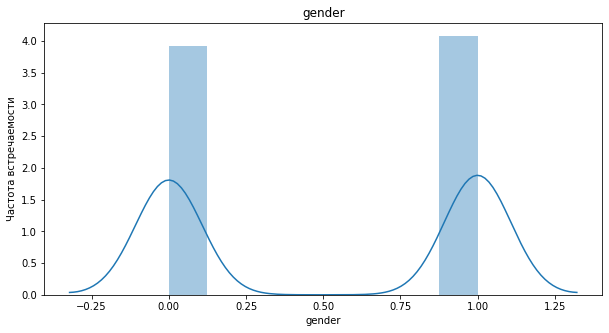

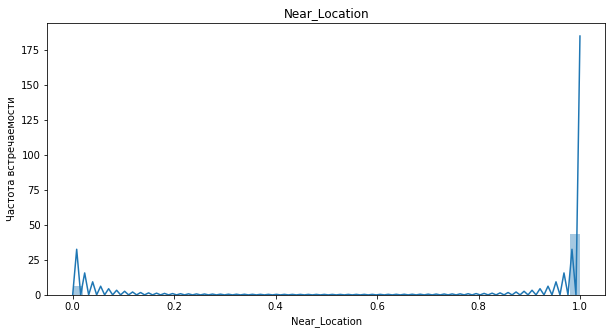

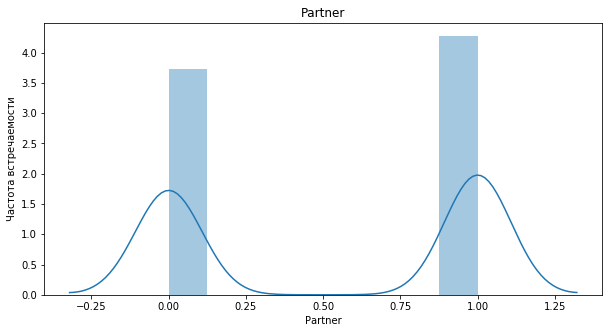

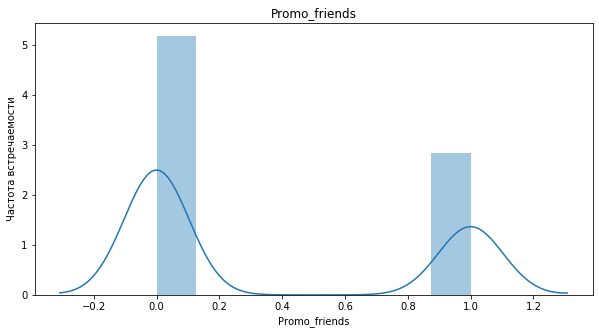

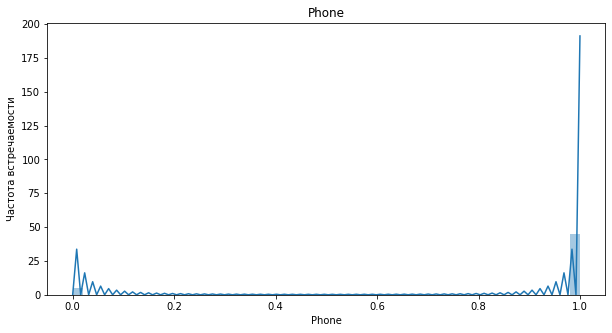

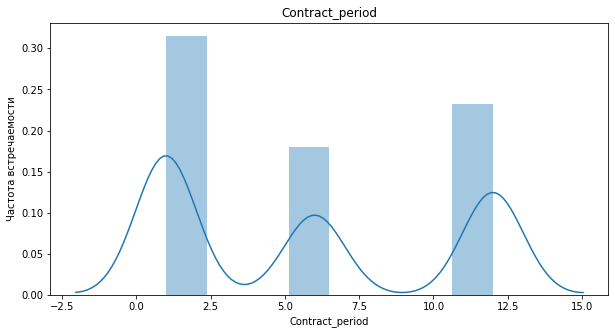

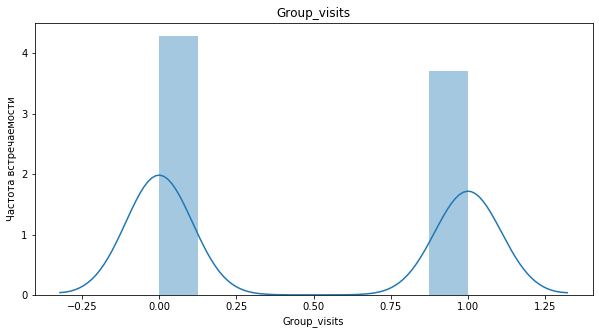

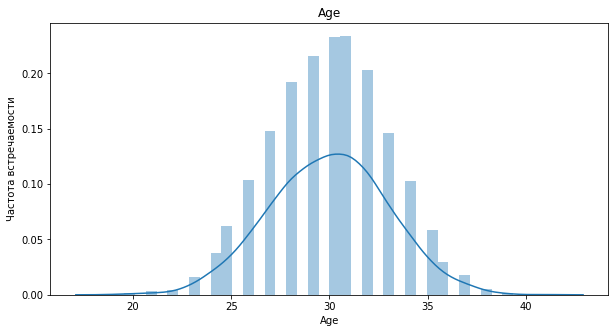

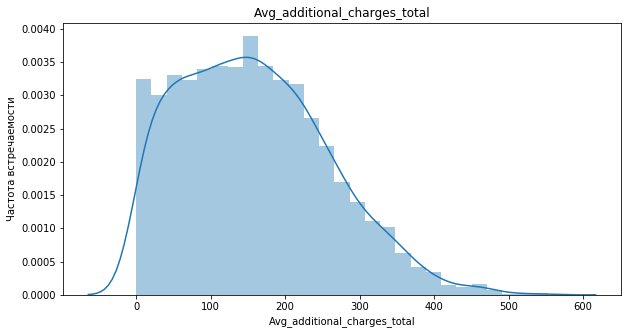

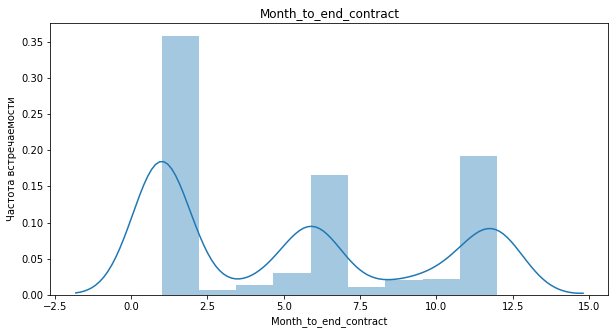

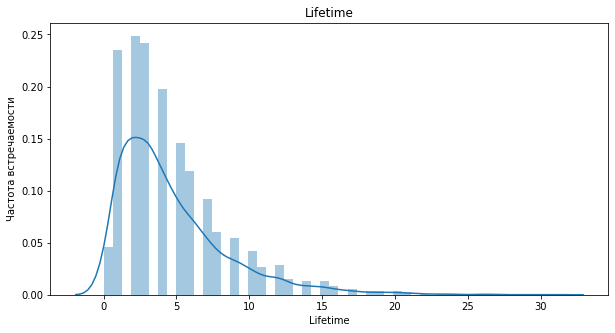

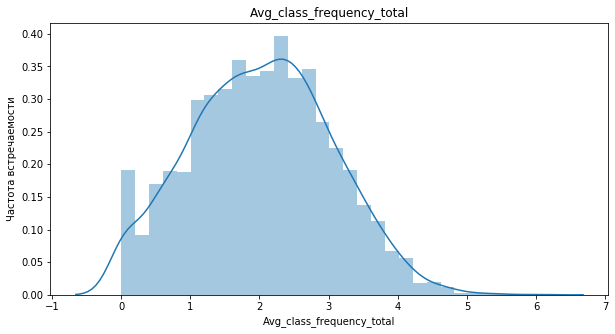

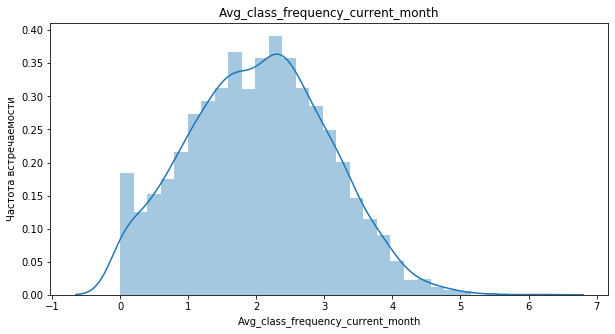

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


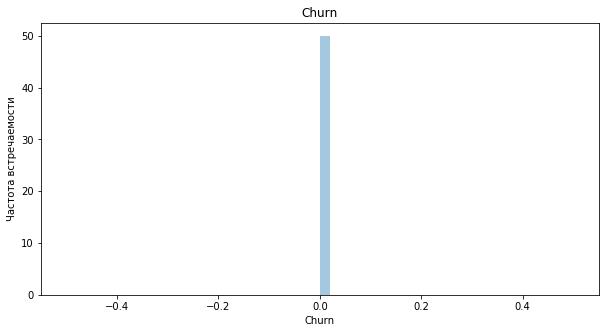

In [10]:
draw_distplot(gym_stay)

Теперь посмотрим на ушедших клиентов.

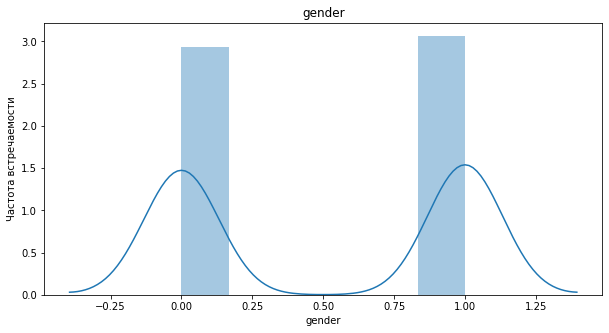

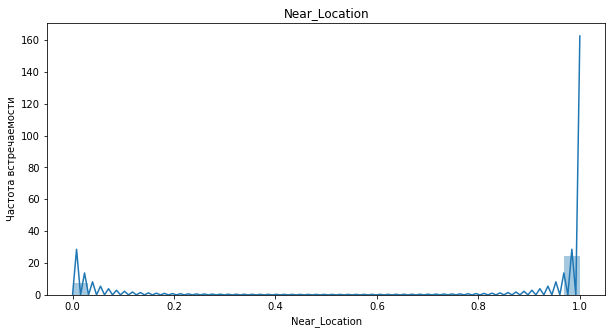

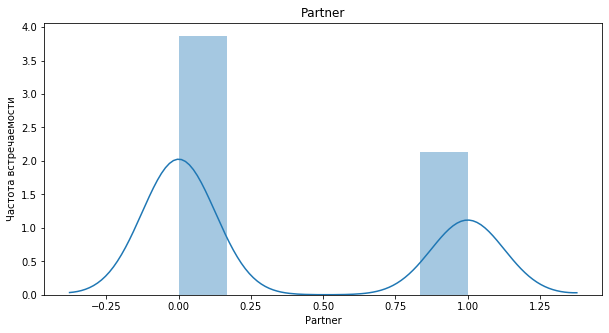

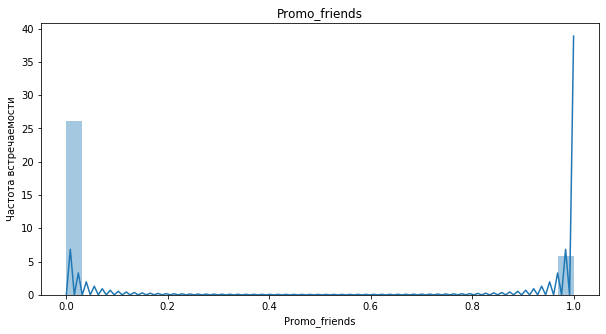

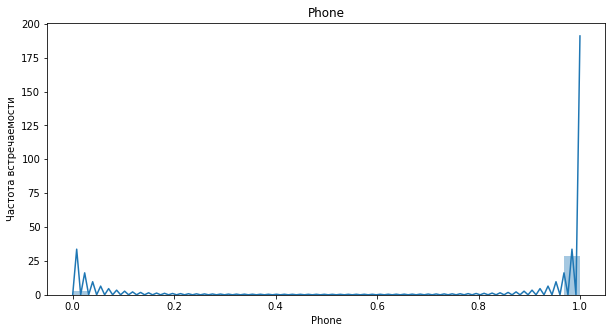

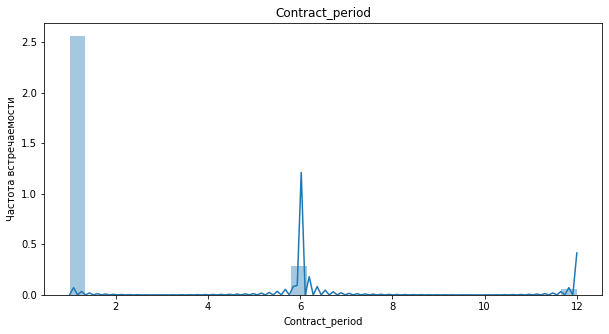

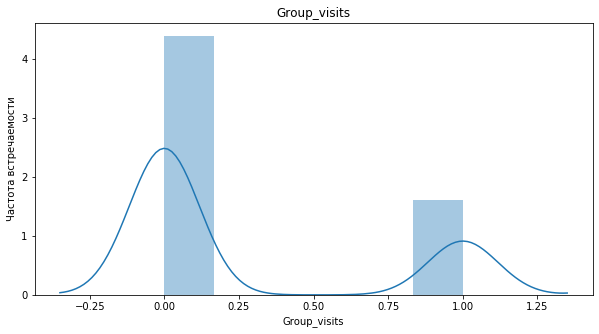

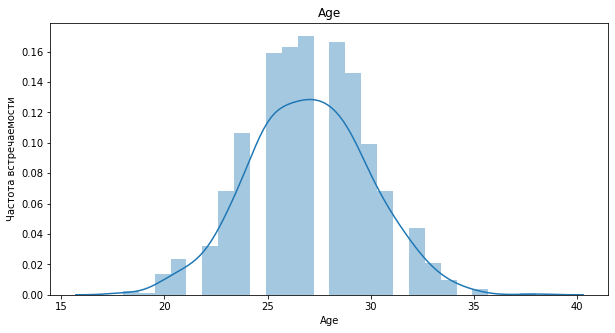

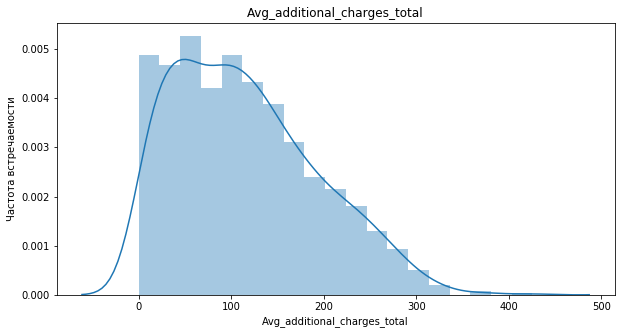

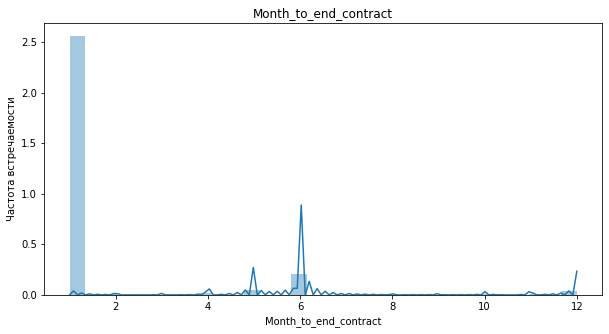

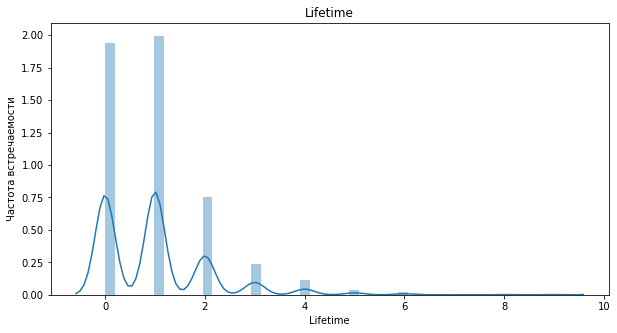

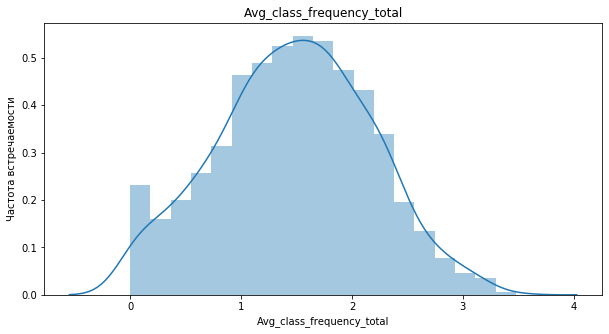

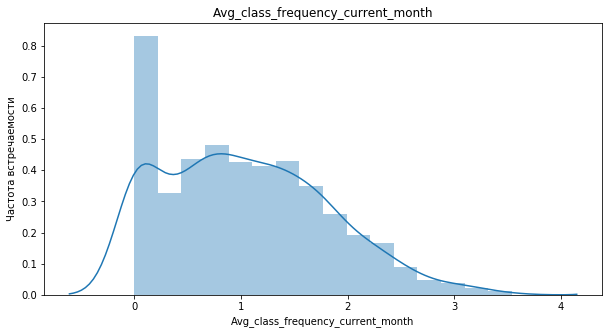

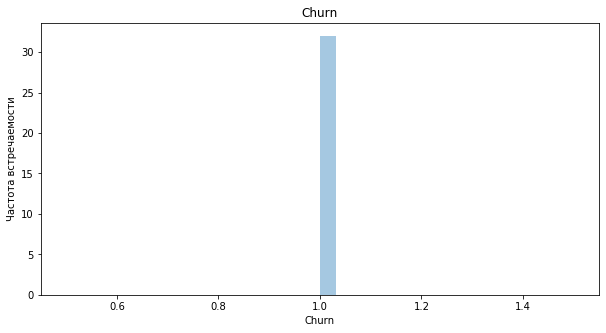

In [11]:
draw_distplot(gym_leave)

Что мы можем сказать, исходя из этих гистограмм? Среди тех, кто ушел в отток, больше тех, кто посещал зал не рядом с домом или работой - это объяснимо. Существенно больше также тех, кто пришел не через партнерские программы компаний и не через друзей. Почти у всех ушедших в отток были месячные абонементы, и они с гораздо меньшей вероятностью посещали групповые занятия. Также обращает на себя внимание возрастной пик в районе 31 года среди тех, кто не ушел в отток. Те, кто ушли, в среднем младше - среднее в районе 27,5 лет - и разнообразнее - пик не так ярко выражен. Также дополнительные траты тех, кто не ушел в отток, распределены несколько более равномерно - падение количества записей по мере роста трат не так велико. Кроме того, видно, что те, кто уходят в отток, обычно делают это на первый же или второй месяц посещения зала - это значит, что клиенты приходят, быстро разочаровываются и уходят. Количество тех, кто уходит, прозанимавшись более двух месяцев, уже невелико. Наконец, те, кто ушел в отток, посещают меньше тренировок в среднем, и существенно меньше - в месяц перед оттоком. 

Теперь построим и отобразим матрицу корреляций для признаков.

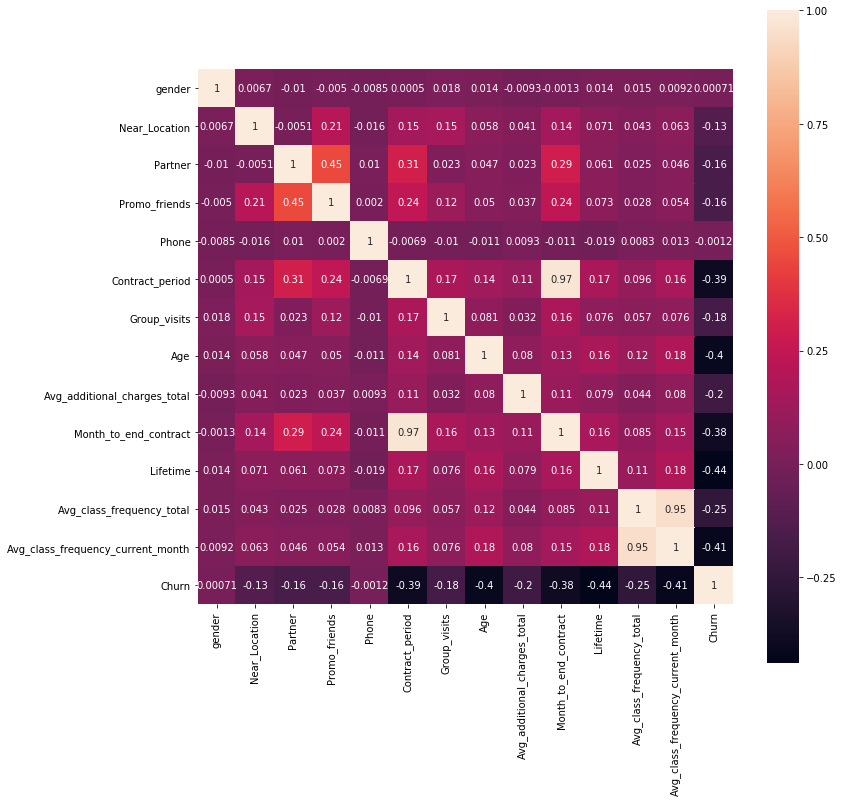

In [12]:
cm = gym_churn_df.corr()
plt.figure(figsize=(12, 12))
ax = plt.subplot()
sns.heatmap(cm, annot=True, square=True)
plt.show()

Что мы видим? Наибольшую корреляцию имеют признаки "сотрудник компании-партнера клуба" и "факт первоначальной записи в рамках акции «приведи друга»". Это вполне объяснимо - среди коллег по работе проще найти того, кто воспользуется промо-кодом, при условии того, что и сама по себе запись в такой зал более выгодна для них по сравнению с обычным залом. Кроме того, мы видим, что несколько характеристик имеют сильную отричательную корреляцию с целевым показателем оттока - возраст, период абонемента, общая продолжительность посещения спортзала и среднее количество посещений за последний месяц. Остальные корреляции выражены существенно слабее. 

### Общие выводы по шагу

На этом шаге мы загрузили данные и провели их первичный анализ. Проблем в данных обнаружено не было - пропусков или неправильно определенных типов данных нет. Далее был проведен исследовательский анализ данных и сделаны первичные выводы. В общем и целом можно сказать, что каких-то неожиданностей или признаков того, что данные собирались неправильно, обнаружено не было. Тепловая карта выявила наличие достаточно сильных корреляций двух признаков - "сотрудник компании-партнера клуба" и "факт первоначальной записи в рамках акции «приведи друга»" - между собой, а также нескольких признаков - возраст, период абонемента, общая продолжительность посещения спортзала и среднее количество посещений за последний месяц - с целевой переменной. Но критического уровня ни одна из корреляций не достигает. В целом нет препятствий к дальнейшему использованию алгоритмов машинного обучения.

## Шаг 3. Строим модель прогнозирования оттока клиентов

Начнем с разбиения данных на обучающую и валидационную выборки.

In [13]:
X = gym_churn_df.drop('Churn', axis = 1)
y = gym_churn_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Далее нам предстоит выбрать одну из двух моделей для дальнейшей работы: логистическую регрессию или случайный лес. Напишем функцию, которая обучает модель, делает с ее помощью предсказания, а после оценивает их и выводит основные метрики.

In [14]:
def test_model(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f}, Precision:{:.2f}, Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

Теперь зададим список моделей, которые мы хотим проверить.

In [15]:
models = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(n_estimators = 100, random_state=0)
]

Наконец, напишем цикл, который выводит метрики каждой из моделей.

In [16]:
for i in models:
    print(i)
    test_model(i, X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy:0.93, Precision:0.86, Recall:0.83
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy:0.92, Precision:0.84, Recall:0.82


Итак, как мы видим, на наших данных лучше по всем метрикам себя показала модель логистической регрессии. Ее и будем использовать в будущем.

## Шаг 4. Проводим кластеризацию клиентов

Для начала проведем стандартизацию данных.

In [17]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

Теперь построим матрицу расстояний на стандартизированных данных.

In [18]:
linked = linkage(X_sc, method = 'ward') 

Наконец, на основе матрицы расстояний построим дендрограмму.

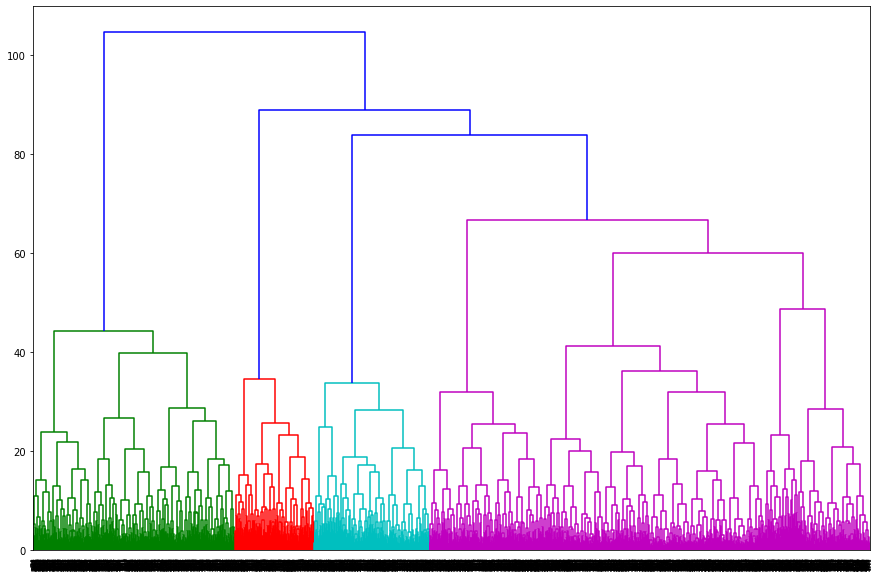

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Как видим, на дендрограмме выделяются 4 разноцветных сегмента, один из которых слишком велик, а потому разделим его на два. Итак, получаем 5 кластеров. Используем эту информацию далее.

Теперь с помощью модели K-Means спрогнозируем кластеры клиентов.

In [20]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(X_sc)

Теперь запишем метки кластеров в поле нашего основного датафрейма.

In [21]:
gym_churn_df['cluster']=labels
print(gym_churn_df.info())
display(gym_churn_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
cluster                              4000 non-null int32
dtypes: float64(4), int32(1), 

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0,4
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0,1
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1,3
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0,3
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0,4


Как видим, все прошло успешно. Теперь приступим непосредственно к анализу получившихся кластеров. Начнем с рассмотрения средних значений признаков.

In [22]:
gym_churn_df.groupby('cluster').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Итак, что можно заметить сразу же? 

Кластер номер 0 - это люди, купившие долгосрочные абонементы. У них средний действующий контракт почти на 11 месяцев, и они реже всех уходят в отток, что неудивительно - кто бросит ходить в фитнес-клуб, имея действующий годовой абонемент? У этого кластера значение Churn чрезвычайно мало - всего 2%. В этой группе больше всего сотрудников компаний-партнеров клуба - видимо, для них годовой абонемент предлагается на более выгодных условиях.

Первый кластер - люди без телефонов. Удивительно, но они четко выделяются в отдельный кластер - у всех остальных вероятность того, что человек оставил номер телефона, близка к 100%, а в этой группе она равна 0. При этом люди исправно посещают занятия, в том числе групповые, платят среднее количество денег за дополнительные услуги, имеют достаточно долгосрочные контракты, и это точно не пенсионеры (средний возраст - 29 лет). Получается, что отсутствие указанного телефона - самая главная их отличительная черта.

В отдельный кластер (второй) выделяется группа людей, которые ходят в фитнес-центры не по месту своего жительства или работы - для этого кластера среднее значение Near_location равно нулю, тогда как для следующего за ним по этому показателю - сразу 0,86. Почему эти люди это делают? Возможно, компании стоит взглянуть не географию распределения своих залов - вероятно, какие-то районы ими не охвачены совсем. Если обнаружится территориальная группировка клиентов из этого кластера - возможно, имеет смысл задуматься об открытии дополнительной или дополнительных точек. 

Третий кластер - назовем его "случайные люди". Их скорее всего не привела ни компания, где они работают, ни знакомые. Главный фактор для них - это то, что фитнес-центр расположен недалеко от их дома или работы. Они купиили краткосрочный абонемент, чуть больше одного раза в среднем сходили в зал, потратили меньше всех денег на дополнительные услуги и с вероятностью более 50% в следующем месяце ушли. Обращает на себя внимание также и то, что это самая молодая в среднем группа. Пожалуй, это главная точка роста для компании. Более детальные преложения по ним сформулируем чуть позже.

Кластер номер 4 - его можно назвать "энтузиасты". Это люди, которые пришли не потому, что работают в компании-партнере, не потому, что их привели друзья, а явно по собственной инициативе и для того, чтобы использовать абонемент по максимуму. Они чаще всех посещают фитнес-центры в среднем, чаще всего - за последний месяц, дольше всех "живут" как клиенты в среднем и больше всех тратят.

Теперь построим распределения признаков для каждого из кластеров. Воспользуемся уже использованной нами функцией.

Начнем с нулевого кластера.

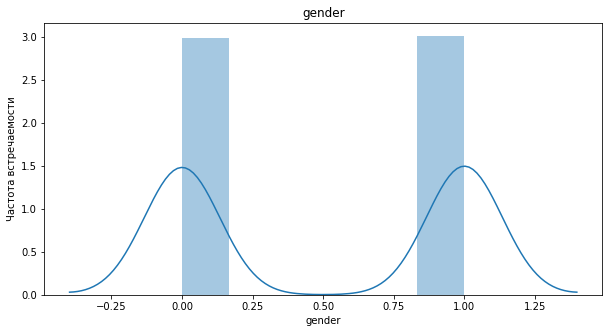

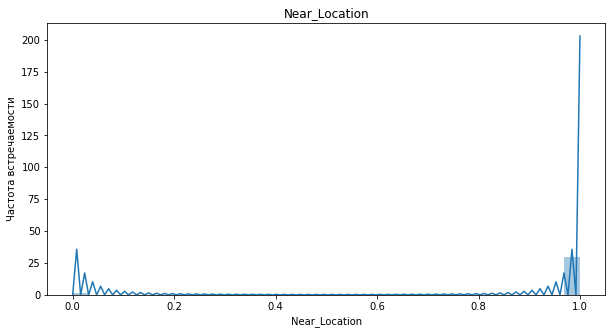

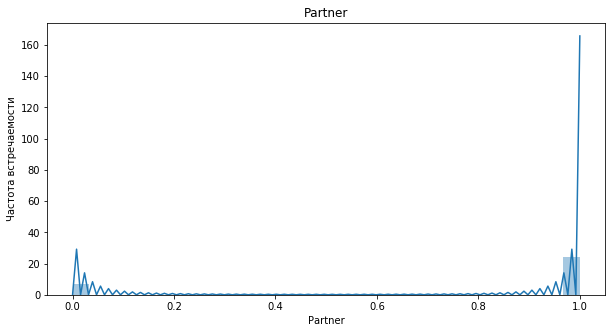

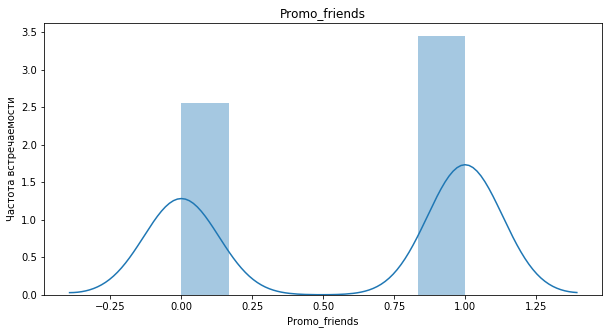

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


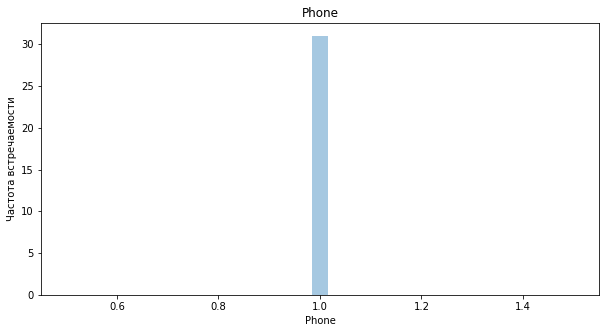

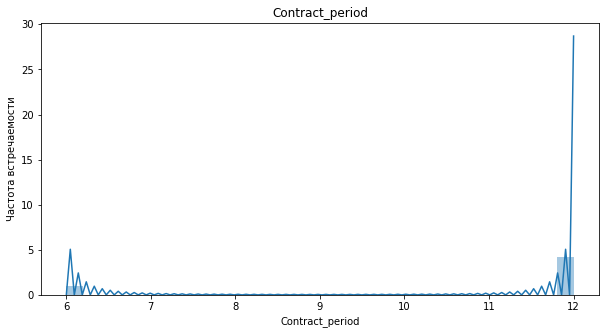

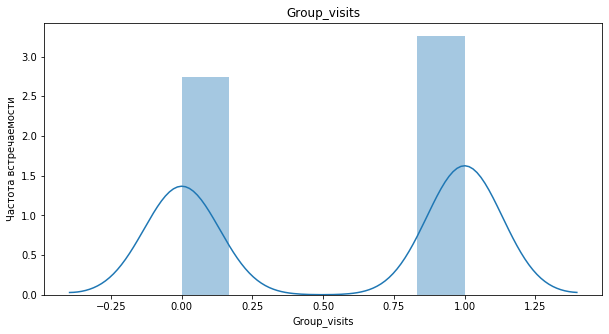

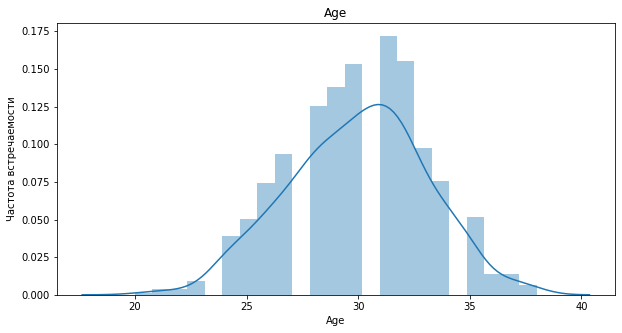

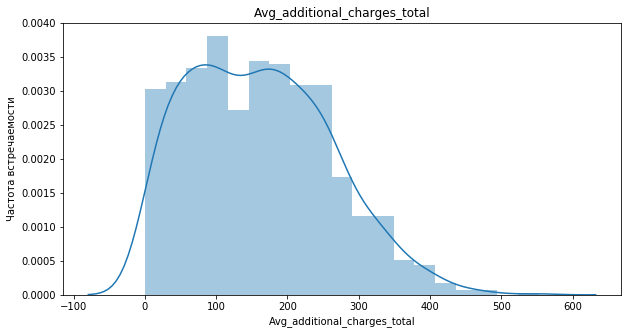

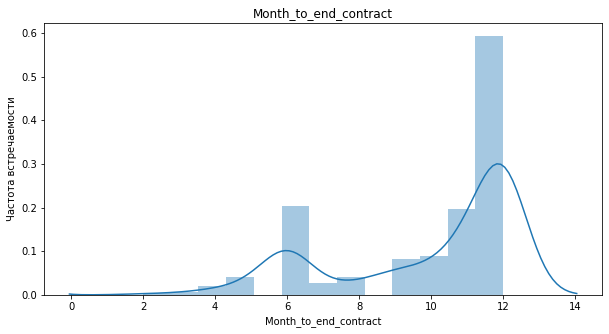

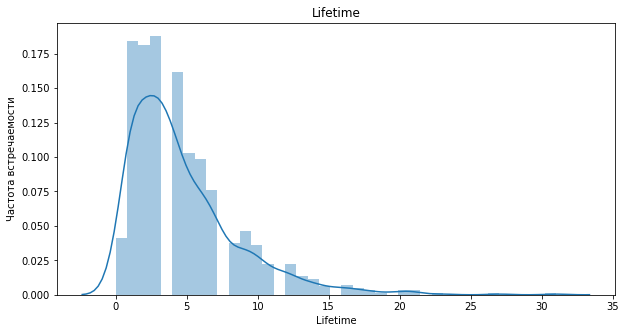

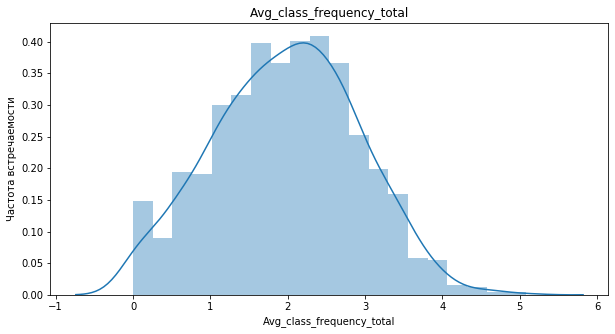

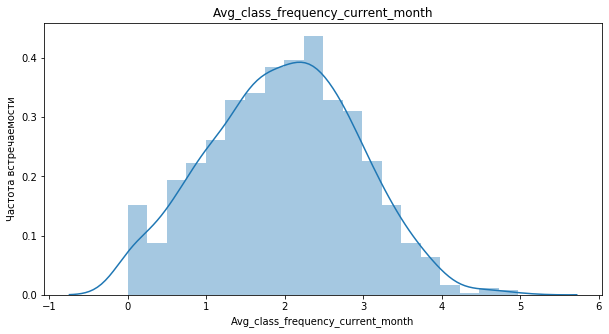

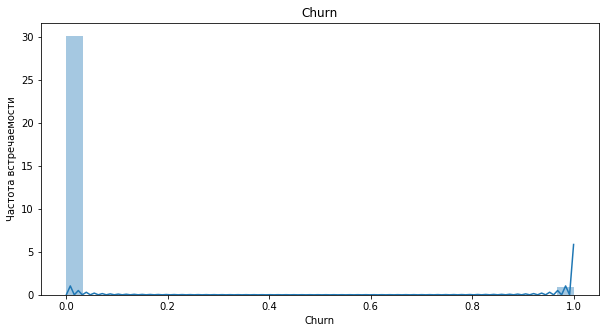

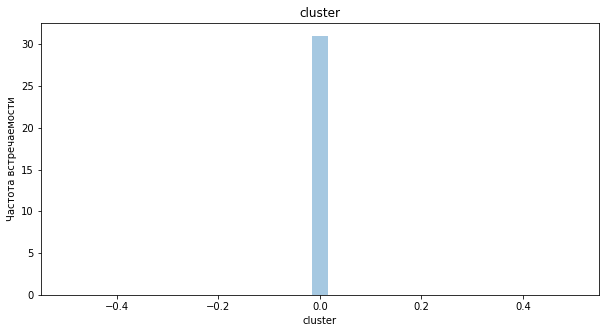

In [23]:
draw_distplot(gym_churn_df.query('cluster==0'))

Обращают на себя внимание интересные провалы на некоторых графиках, что возможно связано с малым количеством попавших в этот кластер. Также отметим стабильность посещения - графики общей частоты посещения и частоты для текущего месяца очень похожи. Видимо, люди установили для себя стабильное расписание и следуют ему. Теперь перейдем к первому кластеру.

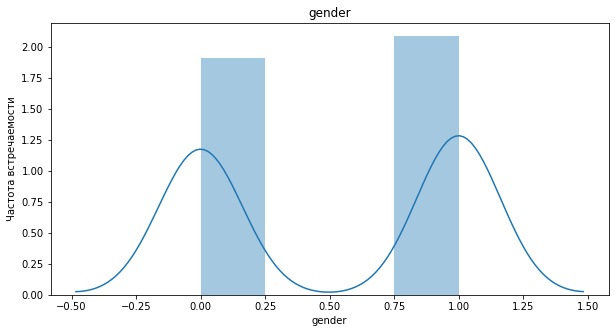

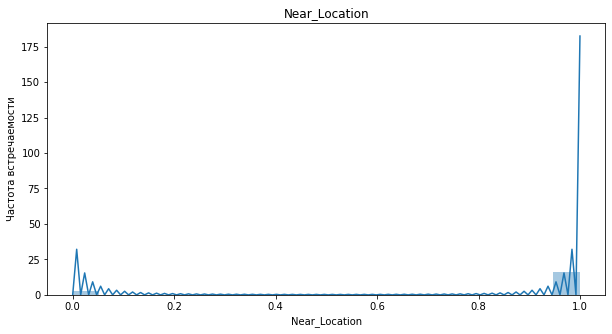

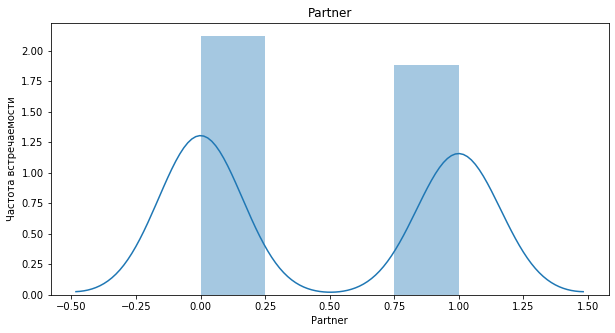

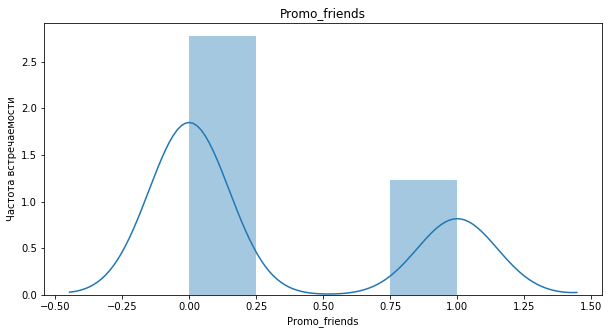

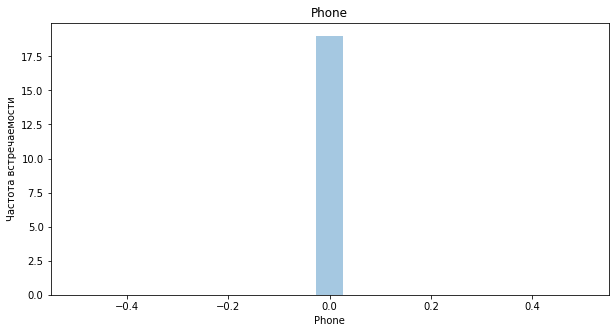

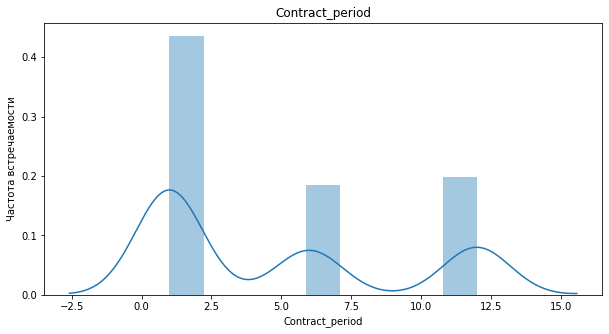

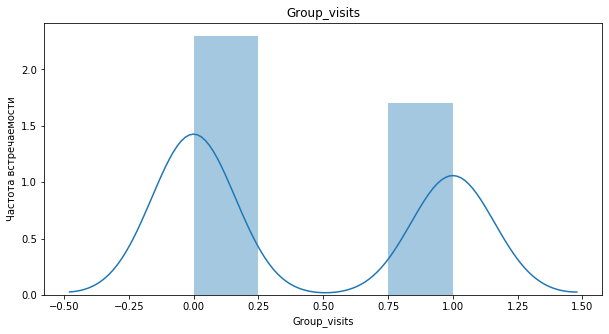

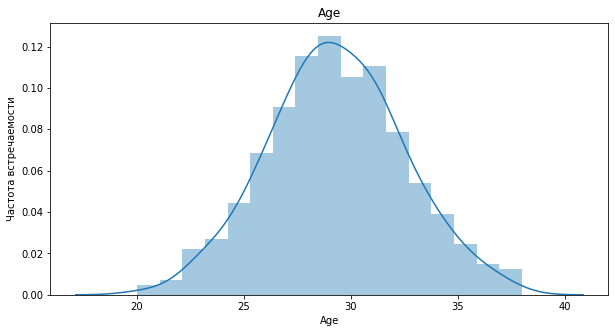

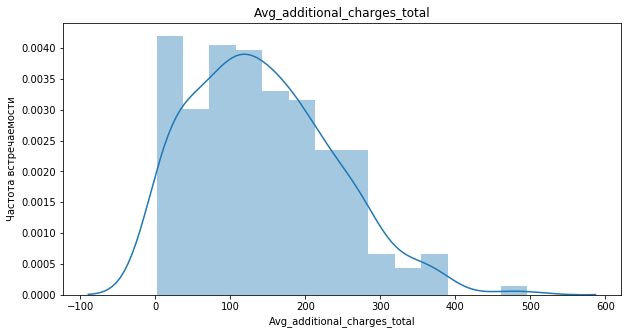

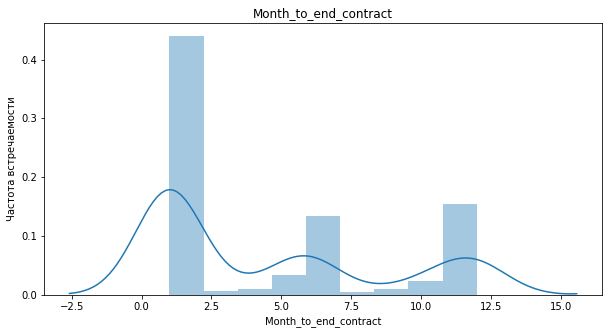

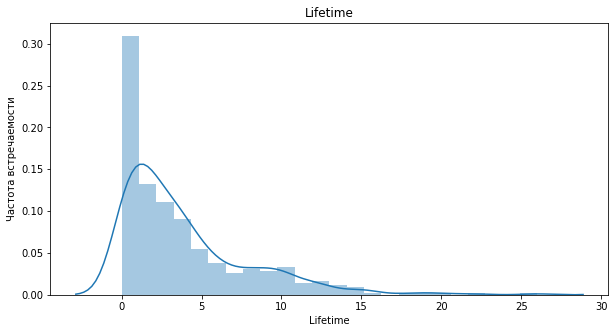

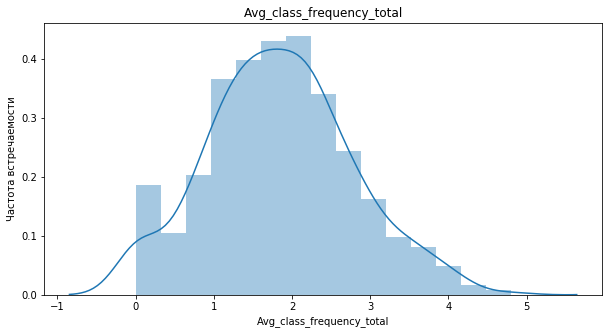

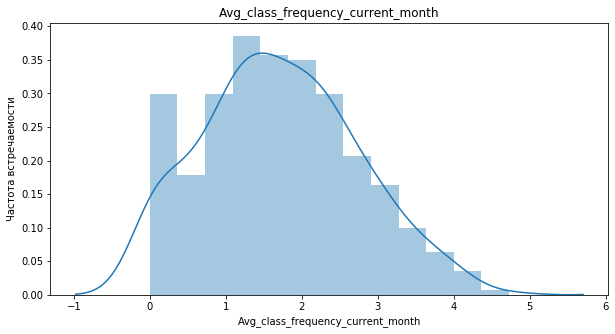

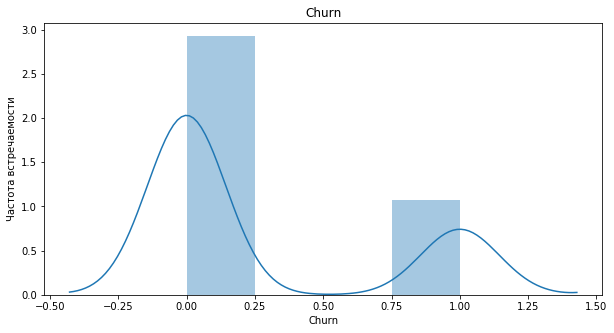

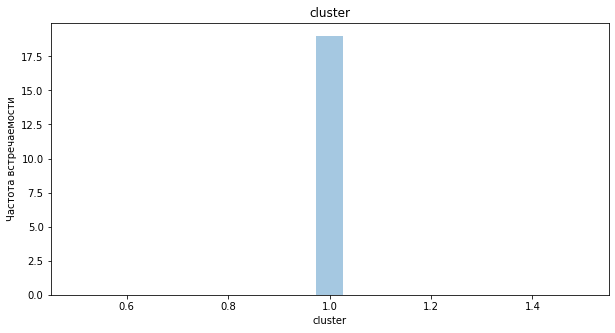

In [24]:
draw_distplot(gym_churn_df.query('cluster==1'))

Довольно много людей с околонулевым lifetime, несмотря на высокий средний показатель. Или люди только в начале своего пути, или у нас есть проблемы в коммуникациях с ними. Этот вопрос еще требует дальнейшего изучения. Перейдем ко второму кластеру.

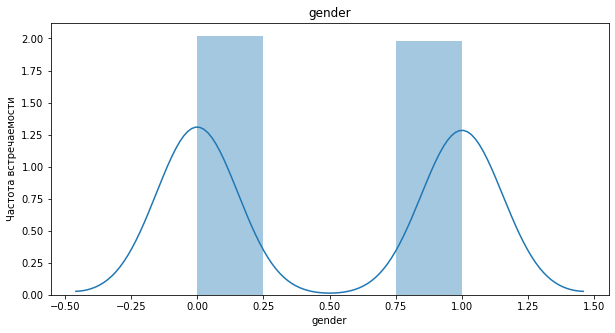

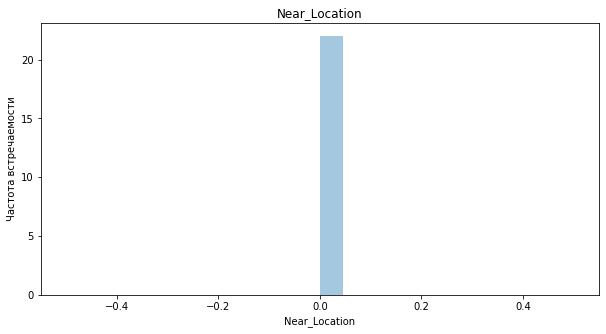

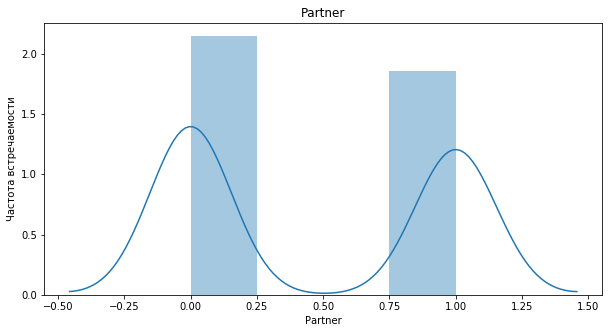

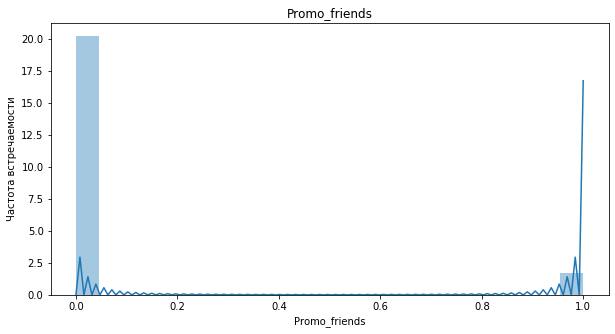

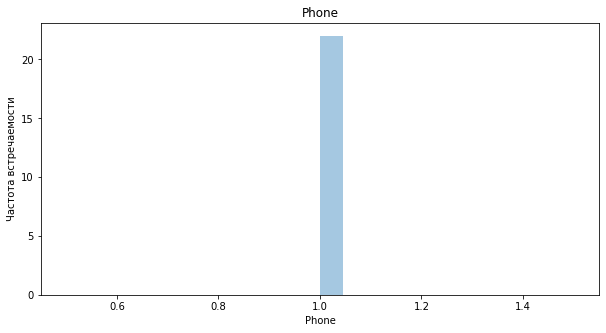

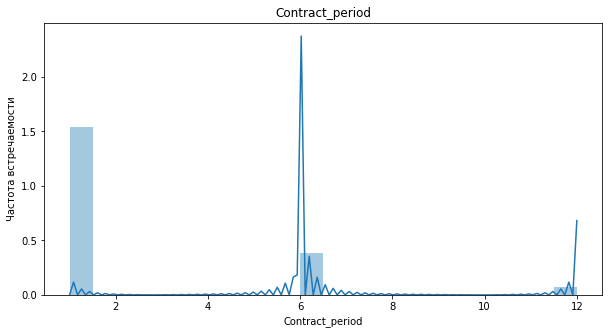

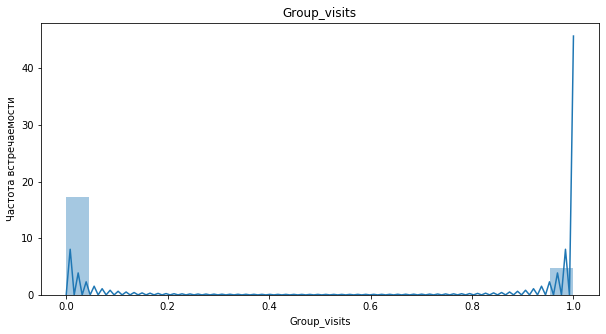

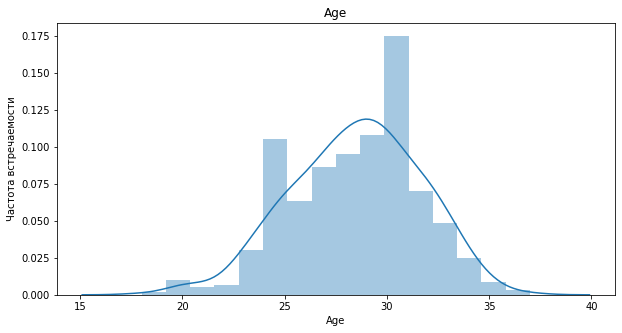

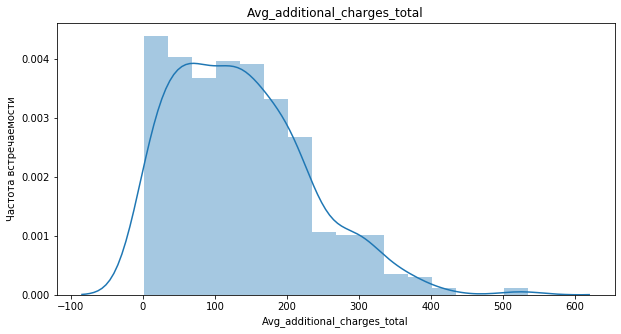

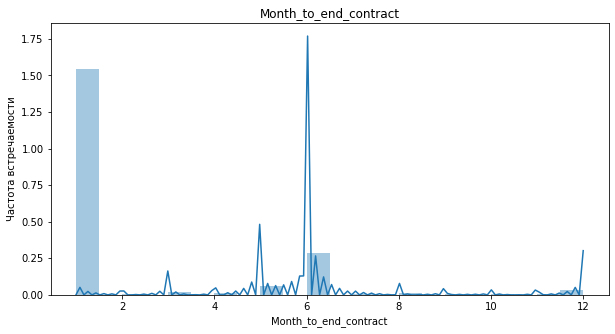

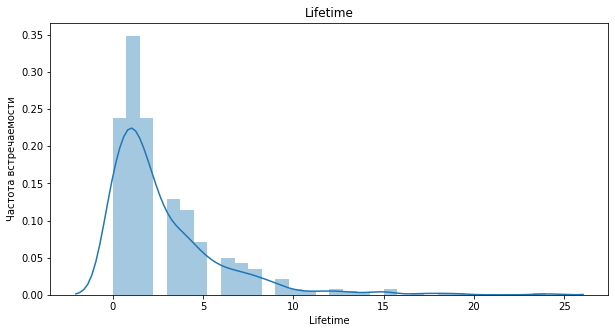

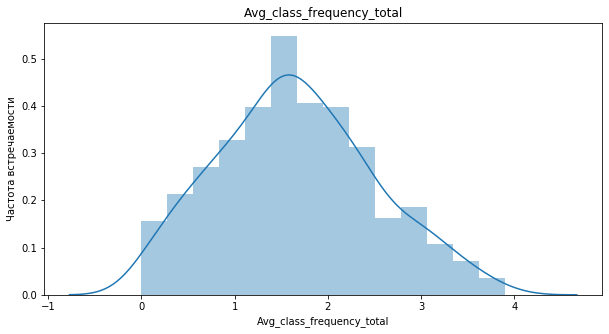

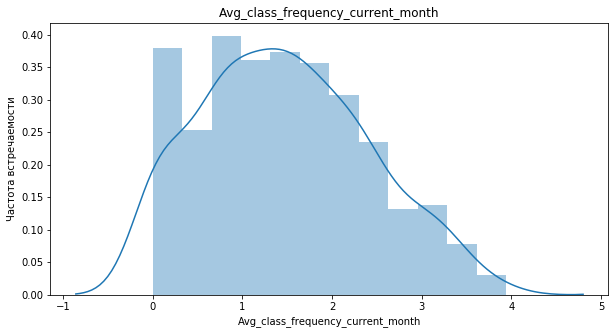

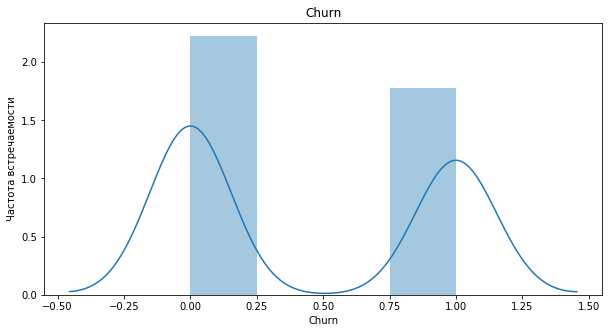

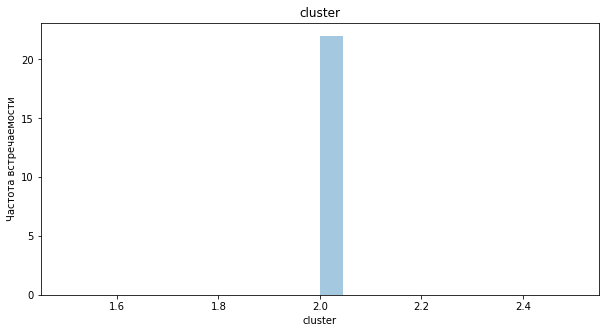

In [25]:
draw_distplot(gym_churn_df.query('cluster==2'))

Обращает на себя внимание, что среди них достаточно много людей, которые в текущем месяце посещали фитнес-центр и два, и три раза. То есть люди достаточно мотивированы, несмотря на неудобное расположение. Также видим, что достаточно ощутимое количество имеет полугодовые абонементы, но вот годовые - уже почти никто. Перейдем к третьему кластеру.

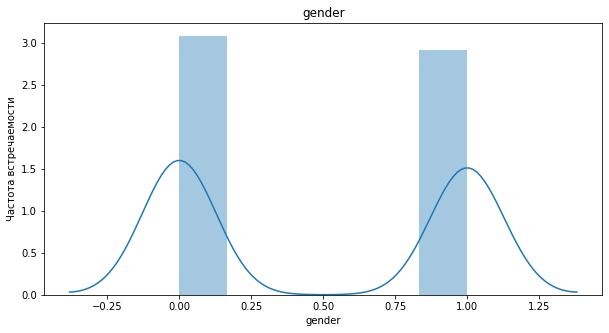

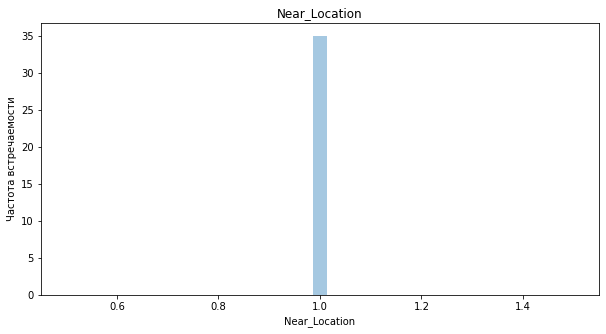

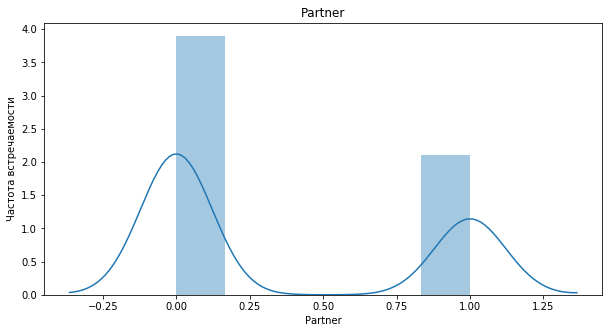

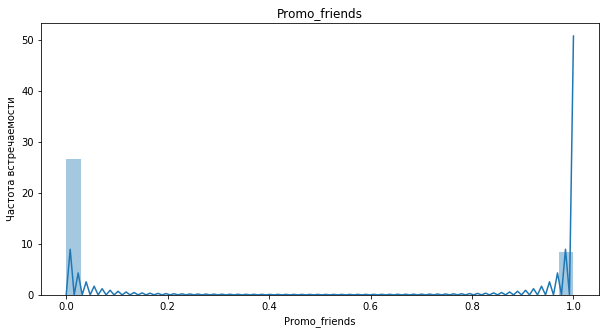

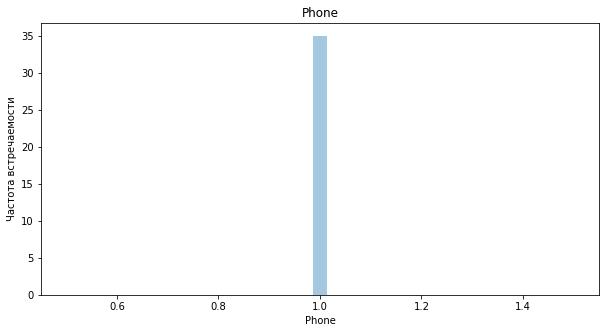

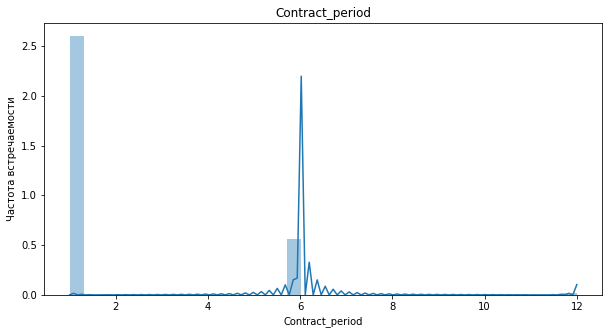

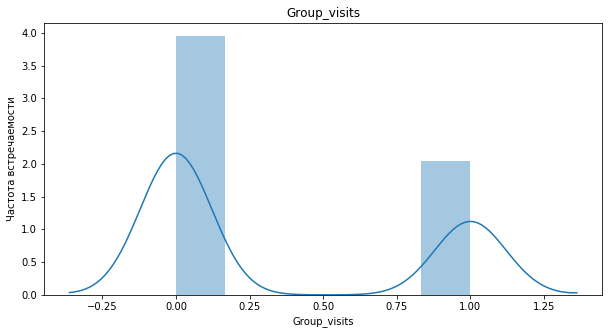

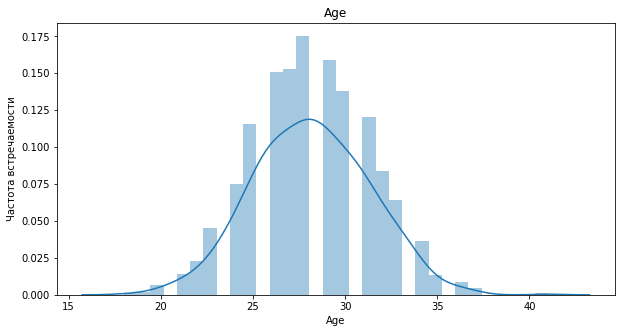

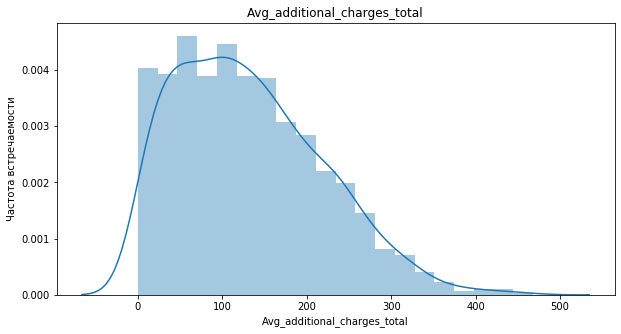

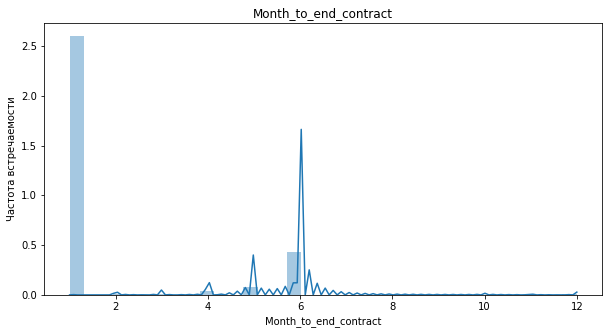

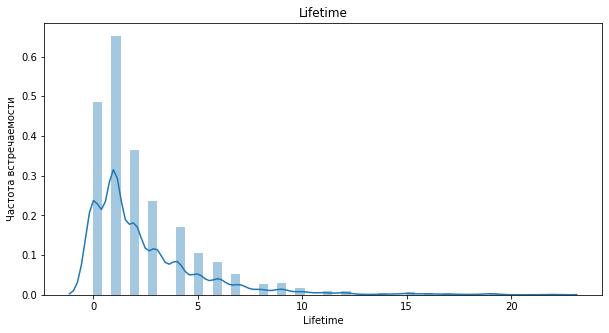

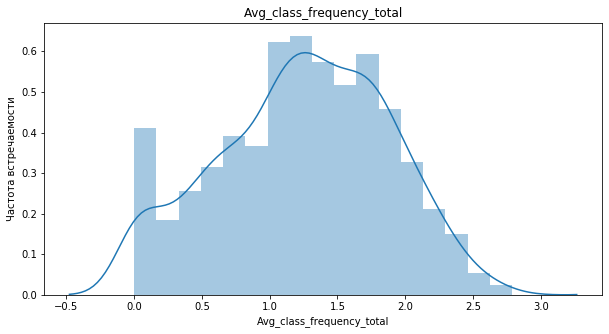

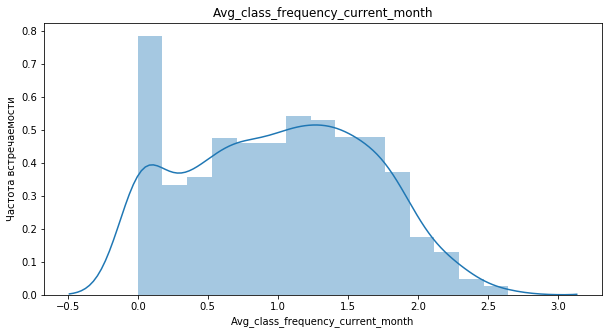

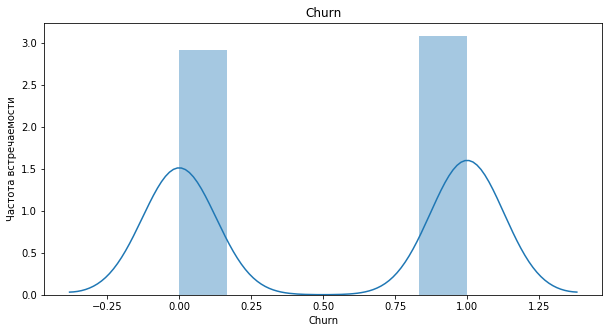

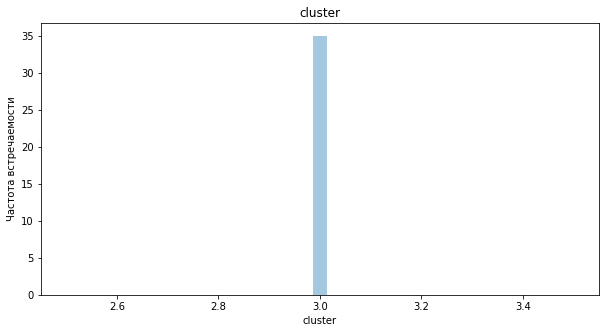

In [26]:
draw_distplot(gym_churn_df.query('cluster==3'))

Очень большие пики около нуля на графиках общего количества посещений и за текущий месяц, и всего (что для этой группы во многом одно и то же). Как бы ни были хороши наши фитнес-центры, люди не узнают об этом, если не придут туда. Значит, необходимо их вовлечение. 

Наконец рассмотрим заключительный четвертый кластер.

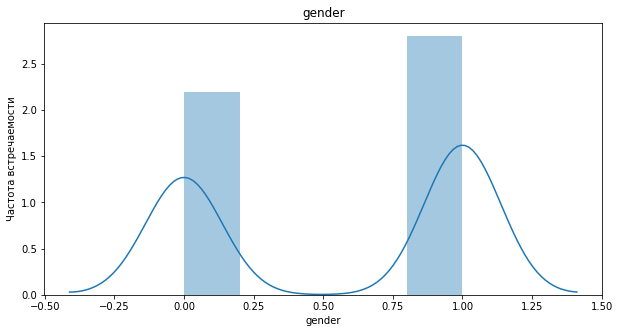

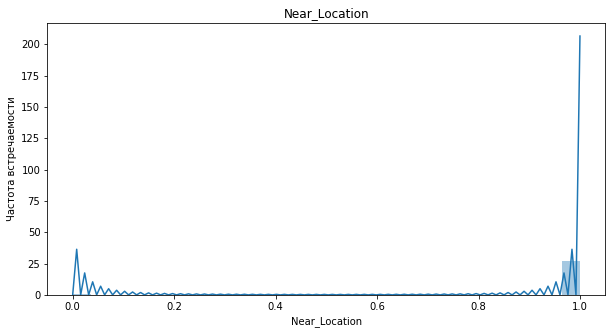

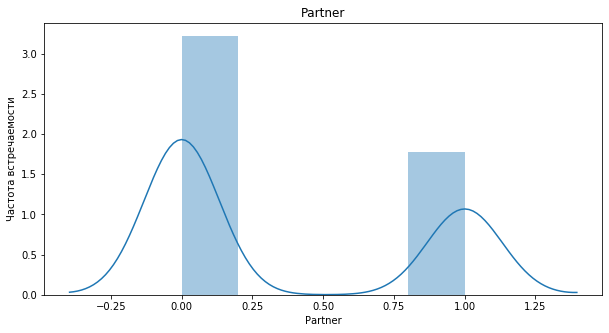

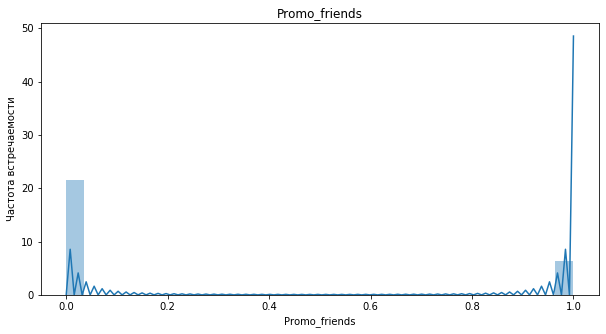

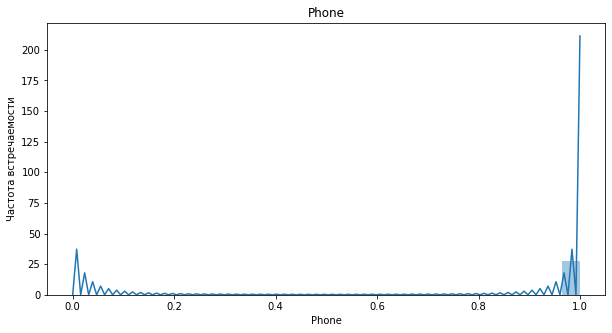

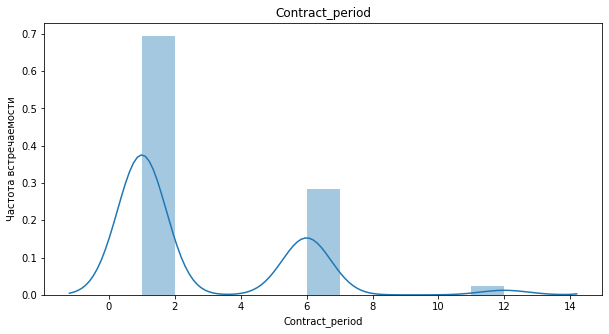

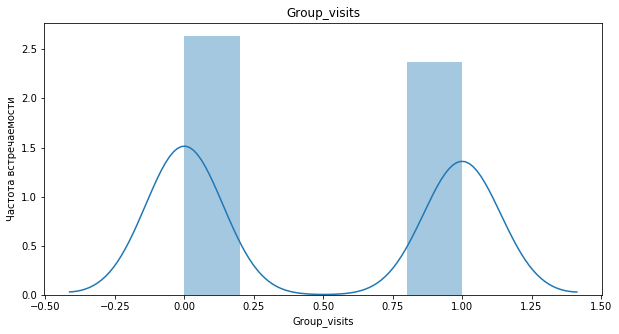

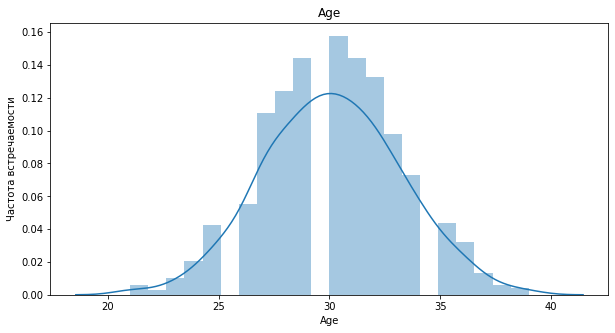

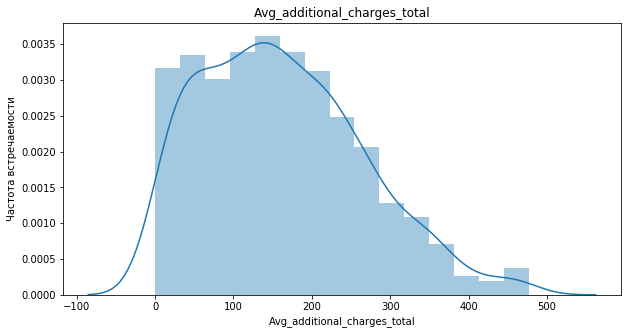

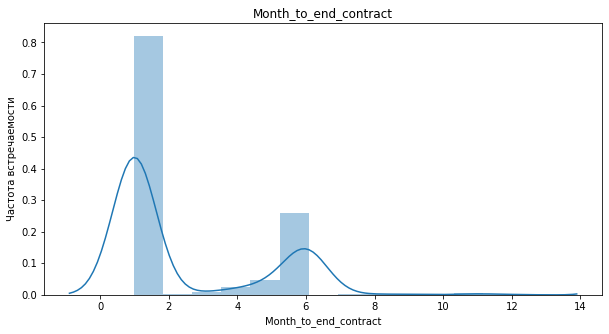

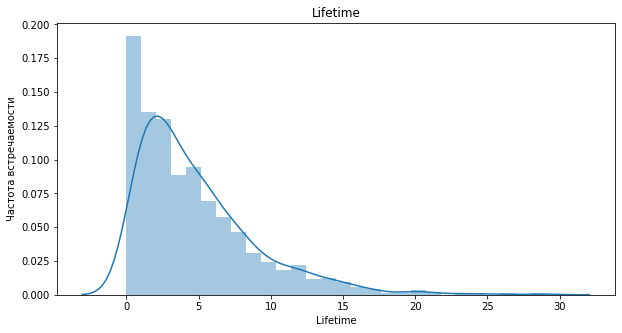

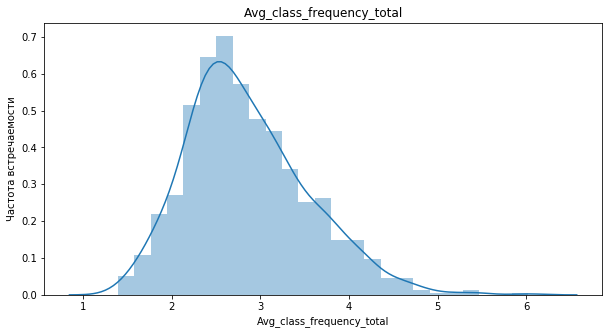

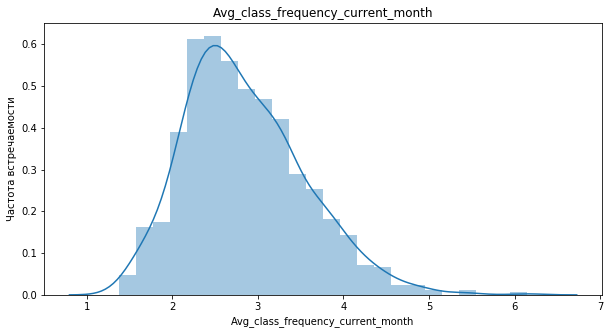

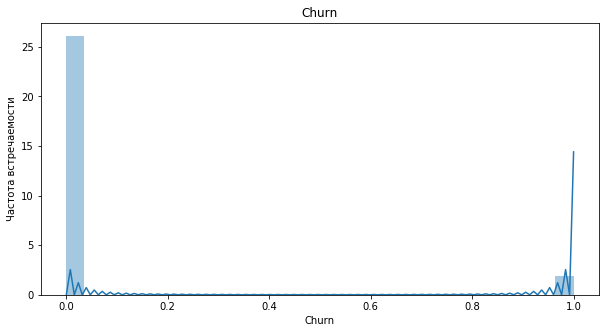

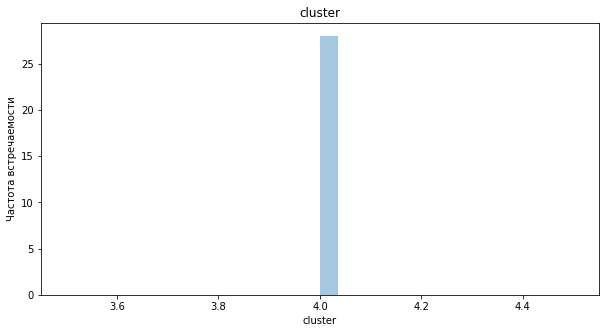

In [27]:
draw_distplot(gym_churn_df.query('cluster==4'))

Заметим, что большинство людей имеют краткосрочные абонементы, хотя посещают фитнес-центры активно. Возможно, здесь есть потенциал для роста.

Теперь рассмотрим отдельно долю оттока по каждому из кластеров. Мы уже касались этого вопроса, но здесь остановимся на нем подробно.

In [28]:
gym_churn_df.groupby('cluster')['Churn'].agg('mean')

cluster
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: Churn, dtype: float64

Как видим, разница в цифрах более чем впечатляющая - для третьего кластера вероятность оттока более 50%, для второго - более 44. Для первого - более 26. На их фоне резко выделяются надежные кластеры - нулевой (вероятность оттока около 2%) и четвертый (около 6%).

## Шаг 5. Выводы и рекомендации

В ходе данного проекта мы изучили поведение клиентов сети фитнес-центров. 

На первом шаге проекта мы ознакомились с данными, проверили их полноту и корректность. К счастью, пропусков и неправильно указанных типов <b>в данных не оказалось</b>.

На втором шаге мы провели исследовательский анализ данных - изучили <b>средние значения и стандартные отклонения</b> для всего датасета, а также отдельно - <b>средние значения</b> для тех клиентов, которые <b>ушли в отток в сравнении с теми, которые остались</b>. Для этих же двух групп были построены <b>столбчатые гистограммы и гистограммы распределения признаков</b>. На этом этапе уже были сделаны <b>первые выводы</b>: среди клиентов, которые не ушли в отток, в среднем больше тех, кто посещает спортзал <b>рядом с местом работы или учебы</b>, существенно больше <b>сотрудников компаний-партнеров клуба</b> и почти в два раза больше тех, пришел в рамках <b>акции «приведи друга»</b>. Кроме того, те, кто не ушел в отток, имеют гораздо большее <b>среднее время действующего абонемента</b>, гораздо чаще посещают <b>групповые занятия</b> и в среднем тратят почти <b>на 40% больше денег на дополнительные услуги</b>. Кроме того, у не ушедших в отток клиентов в среднем <b>более чем в три раза больший срок до окончания текущего абонемента</b> и <b>почти в 5 раз больший lifetime</b> - это значит, что клиенты либо приходят и сразу уходят, либо остаются на более или менее длительный срок. Кроме того, не ушедшие в отток клиенты существенно <b>чаще посещают занятия в целом и почти в два раза чаще - в течение предыдущего месяца</b>. Кроме того, на этом же шаге мы построили <b>матрицу корреляций</b> и пришли к выводу, что никакие признаки не имеют степени корреляции больше, чем <b>0,45</b>, что не является критичным.

На третьем шаге мы сравнили две модели бинарной классификации для целей прогнозирования оттока клиентов и пришли к выводу, что лучше с поставленными задачами справляется модель <b>логистической регрессии</b>.

На четвертом шаге мы <b>стандартизировали данные</b>, построили матрицу расстояний, а на ее основе нарисовали <b>дендрограмму</b>. На основе анализа дендрограммы было принято решение выделить для дальнейшей работы <b>5 кластеров</b>. Далее с помощью модели <b>K-Means</b> были спрогнозированы кластеры для клиентов. Далее был проведен <b>анализ кластеров</b>: изучены <b>средние значения признаков</b>, построены <b>гистограммы распределения признаков</b>, изучена <b>доля оттока</b> для каждого из кластеров. На основании этого анализа мы можем описать кластеры так: 

- <b>Кластер номер 0</b> - это люди, <b>купившие долгосрочные абонементы</b>. У них средний действующий контракт <b>почти на 11 месяцев</b>, и они <b>реже всех уходят в отток</b> - значение Churn чрезвычайно мало - всего <b>2%</b>. В этой группе <b>больше всего сотрудников компаний-партнеров клуба</b> - видимо, для них годовой абонемент предлагается на более выгодных условиях.

- <b>Первый кластер</b> - <b>люди без телефонов</b>. Они четко выделяются в отдельный кластер - у всех остальных вероятность того, что человек оставил номер телефона, <b>близка к 100%</b>, а в этой группе она <b>равна 0</b>. При этом люди <b>исправно посещают занятия, в том числе групповые, платят среднее количество денег за дополнительные услуги, имеют достаточно долгосрочные контракты</b>. Довольно много людей с <b>околонулевым lifetime</b>, несмотря на <b>высокий средний показатель</b>. Или люди только в начале своего пути, или у нас есть проблемы в коммуникациях с ними. Доля оттока в этом кластере - около 26%.

- Во <b>второй кластер</b> выделяется группа людей, которые ходят в фитнес-центры <b>не по месту своего жительства или работы</b> - для этого кластера среднее значение Near_location равно нулю, тогда как для следующего за ним по этому показателю - сразу 0,86. Эти люди имеют <b>неплохие средние показатели</b>, но <b>высокую долю оттока</b> - более 44%. 

- <b>Третий кластер</b> - назовем его <b>"случайные люди"</b>. Их скорее всего не привела ни компания, ни знакомые. Главный фактор для них - это то, что <b>фитнес-центр расположен недалеко от их дома или работы</b>. Они купиили <b>краткосрочный абонемент</b>, <b>чуть больше одного раза в среднем сходили в зал</b>, <b>потратили меньше всех</b> денег на дополнительные услуги и <b>с вероятностью более 50% в следующем месяце ушли</b>. Обращает на себя внимание также и то, что это <b>самая молодая в среднем группа</b>. Очень большие пики около нуля на графиках общего количества посещений и за текущий месяц, и всего. <b>Необходимо вовлечение этой группы.</b> 

- <b>Кластер номер 4</b> - его можно назвать <b>"энтузиасты"</b>. Это люди, которые пришли <b>по собственной инициативе</b> и для того, чтобы <b>использовать абонемент по максимуму</b>. Они <b>чаще всех</b> посещают фитнес-центры в среднем, чаще всего - за последний месяц, <b>дольше всех "живут" как клиенты в среднем и больше всех тратят</b>.


<b>Рекомендации</b> по работе с клиентами такие:

- Иметь в виду, что партнерские программы с организациями и акция «приведи друга» часто идут одновременно. Они дают клиентов, но возможно нужно более активно предлагать им дополнительные услуги, чтобы компенсировать более низкую базовую цену абонемента.

- Организовать сбор телефонов клиентов, не оставивших их при первичной записи - это позволит более эффективно с ними взаимодействовать и снизить вероятность их оттока

- Изучить, как территориально распределены клиенты из второго кластера, и проработать возможность открытия новых фитнес-центров в неохваченных районах при наличии в них высокой концентрации клиентов. Это позволит снизить отток в этом кластере.

- Продумать пути вовлечения клиентов из кластера 3. Они лишены социального подкрепления - на занятиях нет ни друзей, ни коллег, групповые занятия они также не посещают. Возможно, организовать специальные групповые занятия для новичков, чтобы побудить этих людей чаще посещать занятия.

- Предложить более длительные абонементы клиентам из кластера 4 - не видно причин, почему их не заинтересовало бы такое предложение.